# <font color='red'> Project 1

### Dataset
For two projects in this class, you will pick your datasets. To receive full credit for this part, your datasets should satisfy the following conditions: 

- At least 15 features (columns)
- At least 1000 instances (rows)
- At least two categorical/ordinal columns.
- Between 5 to 10 percent missing values across the dataset. 

Remember that you should have two separate datasets one for classification and one for regression tasks. 

### Project Description:
- Read data into Jupyter notebook, use pandas to import data into a data frame
- Preprocess data: Explore data, check for missing data and apply data scaling. Justify the type of scaling used.

### Regression Task:
- Apply **all** the regression models you've learned so far. If your model has a scaling parameter(s) use Grid Search to find the best hyper-parameter. Use plots and graphs to help you get a better glimpse of the results. 
- Then use cross-validation to find average training and testing score. 
- Your submission should have at least the following regression models: KNN repressor, linear regression, Ridge, Lasso, polynomial regression, SVM both simple and with kernels (rbf, poly, linear), Decison Tree Regressor. 
- Finally, find the best regressor for this dataset and train your model on the entire dataset using the best parameters and predict the target values for the test_set.

### Classification task:
- Decide about a good evaluation strategy beside accuracy and justify your choice.
- Apply **all** the classification models you've learned so far. If your model has a scaling parameter(s) use Grid Search to find the best hyper-parameter. Use plots and graphs to help you get a better glimpse of the results.
- Your submission should have at least the following classification models: KNN classification, Logistic Regression, Linear Support Vector Machine, Kerenilzed Support Vector Machine (rbf, poly, and linear), Decision Tree Classifier. 
- Finally, find the best model for the classification dataset and train your model on the entire dataset using the best parameters and predict the target values for the test_set.

### Deliverables:
- Use markdown to provide inline comments for this project. 
- Use markdown to create a report for this project. 
- Your outputs should be clearly executed in the notebook i.e. we should not need to rerun the code to obtain the outputs. 
- Visualization highly encouraged. 
- If you are submitting two different files, then please only one group member submit both the files. If you submit two files separately from different accounts, it will be submitted as two different attempts.
- If you are submitting two different files, then please follow below naming convention:
    - ``Project1_Regression_GroupXX_Lastname1_Lastname2.ipynb``
    - ``Project1_Classification_GroupXX_Lastname1_Lastname2.ipynb``
  
  then zip these two files and the csv files of the two datasets into one file and submit. 
- If you are submitting a single file, then please follow below naming convention:
    - ``Project1_Both_GroupXX_Lastname1_Lastname2.ipynb
    then zip these this file and the csv files of the two datasets into one file and submit. 

### Questions regarding the project:
- Post your queries related to project on discussion board on e-learning. There is a high possibility that your classmate has also faced the same problem and knows the solution. This is an effort to encourage collaborative learning and also making all the information available to everyone. We will also answer queries there. 

### REGRESSION 

### Content for Regression Dataset
### Source https://www.kaggle.com/kumarajarshi/life-expectancy-who

###The project relies on accuracy of data. The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries The data-sets are made available to public for the purpose of health data analysis. The data-set related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative. It has been observed that in the past 15 years , there has been a huge development in health sector resulting in improvement of human mortality rates especially in the developing nations in comparison to the past 30 years. Therefore, in this project we have considered data from year 2000-2015 for 193 countries for further analysis. The individual data files have been merged together into a single data-set. On initial visual inspection of the data showed some missing values. As the data-sets were from WHO, we found no evident errors. Missing data was handled in R software by using Missmap command. The result indicated that most of the missing data was for population, Hepatitis B and GDP. The missing data were from less known countries like Vanuatu, Tonga, Togo, Cabo Verde etc. Finding all data for these countries was difficult and hence, it was decided that we exclude these countries from the final model data-set. The final merged file(final dataset) consists of 22 Columns and 2938 rows which meant 20 predicting variables. All predicting variables was then divided into several broad categories:​Immunization related factors, Mortality factors, Economical factors and Social factors.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

In [2]:
df = pd.read_csv('Life Expectancy Data.csv')

In [3]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [5]:
df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

In [6]:
org_cols = list(df.columns)
nw_cols = []
for col in org_cols:
    nw_cols.append(col.strip().replace(' ', '_').lower())
df.columns = nw_cols
df.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness__1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

In [7]:
df.rename(columns={'thinness__1-19_years':'thinness_10-19_years'},inplace=True)

In [8]:
df.describe().iloc[:,1:]

,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_10-19_years,thinness_5-9_years,income_composition_of_resources,schooling
count,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


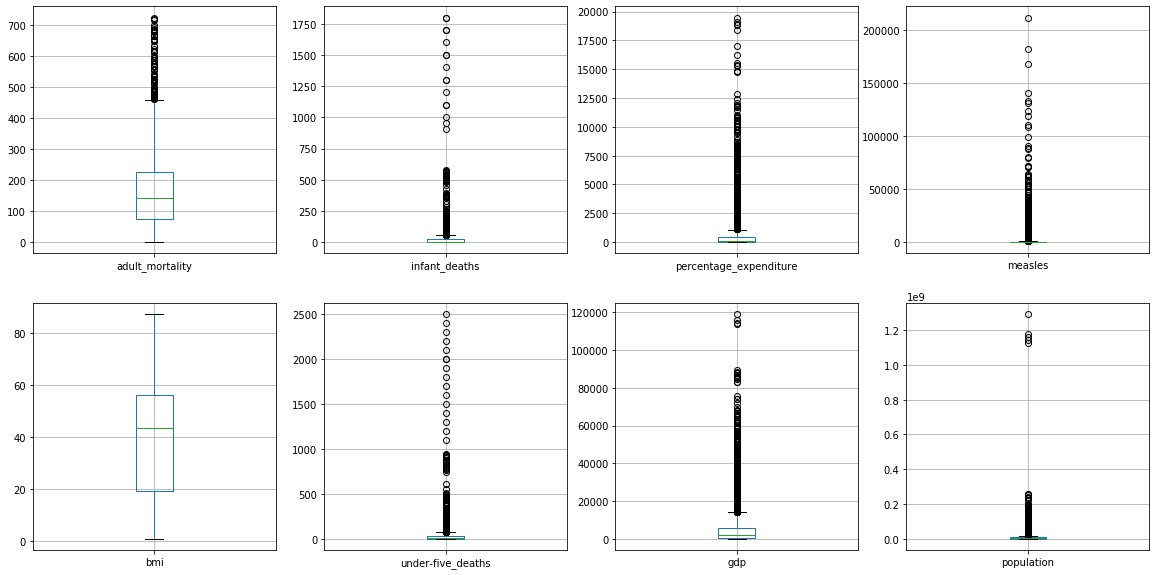

In [9]:
#Adult Mortality Rate can't have a value of 1
#Infant_deaths can't have a value of 1800, it's an outlier
#BMI of 1 or 87 is not possible.It means either the population is too much under-weight or too obese
#Minimum value of population of a country can't be 34
#Plotting Box-plots of these columns having outliers
plt.figure(figsize=(20,10))
for i, col in enumerate(['adult_mortality', 'infant_deaths', 'percentage_expenditure','measles','bmi', 'under-five_deaths', 'gdp', 'population'],start=1):
    plt.subplot(2, 4, i)
    df.boxplot(col)

In [10]:
df[['country', 'gdp','population']].groupby('country').mean()

,gdp,population
country,,
Afghanistan,340.015425,9.972260e+06
Albania,2119.726679,6.969116e+05
Algeria,2847.853392,2.164983e+07
Angola,1975.143045,1.014710e+07
Antigua and Barbuda,9759.305728,NaN
...,...,...
Venezuela (Bolivarian Republic of),NaN,NaN
Viet Nam,NaN,NaN
Yemen,NaN,NaN


In [11]:
df['gdp'] = df['gdp'].replace(' ', np.nan)
df['population'] = df['population'].replace(' ', np.nan)
df = df.dropna(how='any', subset=['gdp', 'population'])
df

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_10-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [12]:
df.shape

(2264, 22)

In [13]:
df.isnull().sum()

country                              0
year                                 0
status                               0
life_expectancy                      2
adult_mortality                      2
infant_deaths                        0
alcohol                            146
percentage_expenditure               0
hepatitis_b                        473
measles                              0
bmi                                 24
under-five_deaths                    0
polio                               11
total_expenditure                  142
diphtheria                          11
hiv/aids                             0
gdp                                  0
population                           0
thinness_10-19_years                24
thinness_5-9_years                  24
income_composition_of_resources      1
schooling                            0
dtype: int64

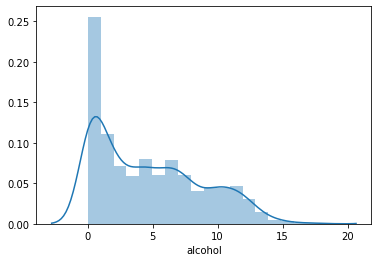

In [14]:
#Checking for Skewness in Data
import seaborn as sns
sns.distplot(df['alcohol'])



In [15]:
df.isnull().sum()


country                              0
year                                 0
status                               0
life_expectancy                      2
adult_mortality                      2
infant_deaths                        0
alcohol                            146
percentage_expenditure               0
hepatitis_b                        473
measles                              0
bmi                                 24
under-five_deaths                    0
polio                               11
total_expenditure                  142
diphtheria                          11
hiv/aids                             0
gdp                                  0
population                           0
thinness_10-19_years                24
thinness_5-9_years                  24
income_composition_of_resources      1
schooling                            0
dtype: int64

In [16]:
df['gdp'] = df.groupby(['country'])['gdp'].transform(lambda x: x.fillna(x.median()))
df['population'] = df.groupby(['country'])['population'].transform(lambda x: x.fillna(x.median()))
df['alcohol'] = df.groupby(['country'])['alcohol'].transform(lambda x: x.fillna(x.median()))
df['life_expectancy'] = df.groupby(['country'])['life_expectancy'].transform(lambda x: x.fillna(x.median()))
df['adult_mortality'] = df.groupby(['country'])['adult_mortality'].transform(lambda x: x.fillna(x.median()))
df['hepatitis_b'] = df.groupby(['country'])['hepatitis_b'].transform(lambda x: x.fillna(x.median()))
df['bmi'] = df.groupby(['country'])['bmi'].transform(lambda x: x.fillna(x.median()))
df['polio'] = df.groupby(['country'])['polio'].transform(lambda x: x.fillna(x.median()))
df['total_expenditure'] = df.groupby(['country'])['total_expenditure'].transform(lambda x: x.fillna(x.median()))
df['diphtheria'] = df.groupby(['country'])['diphtheria'].transform(lambda x: x.fillna(x.median()))
df['thinness_10-19_years'] = df.groupby(['country'])['thinness_10-19_years'].transform(lambda x: x.fillna(x.median()))
df['thinness_5-9_years'] = df.groupby(['country'])['thinness_5-9_years'].transform(lambda x: x.fillna(x.median()))
df['income_composition_of_resources'] = df.groupby(['country'])['income_composition_of_resources'].transform(lambda x: x.fillna(x.median()))
df['schooling'] = df.groupby(['country'])['schooling'].transform(lambda x: x.fillna(x.median()))


In [17]:

df.isnull().sum()

country                              0
year                                 0
status                               0
life_expectancy                      2
adult_mortality                      2
infant_deaths                        0
alcohol                              9
percentage_expenditure               0
hepatitis_b                        128
measles                              0
bmi                                 24
under-five_deaths                    0
polio                                0
total_expenditure                    0
diphtheria                           0
hiv/aids                             0
gdp                                  0
population                           0
thinness_10-19_years                24
thinness_5-9_years                  24
income_composition_of_resources      1
schooling                            0
dtype: int64

In [18]:
df.shape

(2264, 22)

In [19]:
df.describe().iloc[:,1:]

,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_10-19_years,thinness_5-9_years,income_composition_of_resources,schooling
count,2262.000000,2262.000000,2264.000000,2255.000000,2264.000000,2136.000000,2264.0000,2240.000000,2264.000000,2264.000000,2264.000000,2264.000000,2264.000000,2264.000000,2.264000e+03,2240.000000,2240.000000,2263.000000,2264.000000
mean,68.746331,169.634836,34.228799,4.724627,839.385437,78.022940,2570.6197,37.483616,47.570230,81.293286,6.009481,81.404594,2.061793,6628.839008,1.280247e+07,4.870804,4.932455,0.620958,11.911837
std,9.818526,128.855041,132.333898,4.042873,2173.666169,25.392215,11601.7250,19.888726,179.890433,23.848763,2.360899,23.893922,5.670784,13536.349181,6.129943e+07,4.679382,4.777398,0.209099,3.383100
min,36.300000,1.000000,0.000000,0.010000,0.000000,2.000000,0.0000,1.400000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,62.300000,72.000000,0.000000,1.000000,22.166537,72.000000,0.0000,18.775000,1.000000,75.000000,4.387500,77.000000,0.100000,435.661704,1.951538e+05,1.500000,1.500000,0.481500,9.900000
50%,71.400000,146.000000,3.000000,4.090000,97.600031,88.000000,18.0000,42.000000,4.000000,92.000000,5.890000,92.000000,0.100000,1521.980960,1.374823e+06,2.900000,3.000000,0.666000,12.100000
75%,75.400000,235.000000,23.000000,7.555000,501.950334,95.000000,441.0000,55.800000,32.000000,96.000000,7.680000,96.000000,1.100000,5178.561948,7.391118e+06,7.300000,7.400000,0.769000,14.300000
max,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.0000,83.300000,2500.000000,99.000000,16.610000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [20]:
df

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_10-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [21]:
df['life_expectancy'] = df['life_expectancy'].replace(' ', np.nan)
df['adult_mortality'] = df['adult_mortality'].replace(' ', np.nan)
df['alcohol'] = df['alcohol'].replace(' ', np.nan)
df['hepatitis_b'] = df['hepatitis_b'].replace(' ', np.nan)
df['bmi'] = df['bmi'].replace(' ', np.nan)
df['thinness_10-19_years'] = df['thinness_10-19_years'].replace(' ', np.nan)
df['thinness_5-9_years'] = df['thinness_5-9_years'].replace(' ', np.nan)
df['income_composition_of_resources'] = df['income_composition_of_resources'].replace(' ', np.nan)
df = df.dropna()
df

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_10-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [22]:

df.isnull().sum()

country                            0
year                               0
status                             0
life_expectancy                    0
adult_mortality                    0
infant_deaths                      0
alcohol                            0
percentage_expenditure             0
hepatitis_b                        0
measles                            0
bmi                                0
under-five_deaths                  0
polio                              0
total_expenditure                  0
diphtheria                         0
hiv/aids                           0
gdp                                0
population                         0
thinness_10-19_years               0
thinness_5-9_years                 0
income_composition_of_resources    0
schooling                          0
dtype: int64

In [23]:
#plt.figure(figsize=(20,10))
#for i, col in enumerate(['adult_mortality', 'infant_deaths', 'percentage_expenditure','measles','bmi', 'under-five_deaths', 'gdp', 'population'],start=1):
    #plt.subplot(2, 4, i)
    #df.boxplot(col)

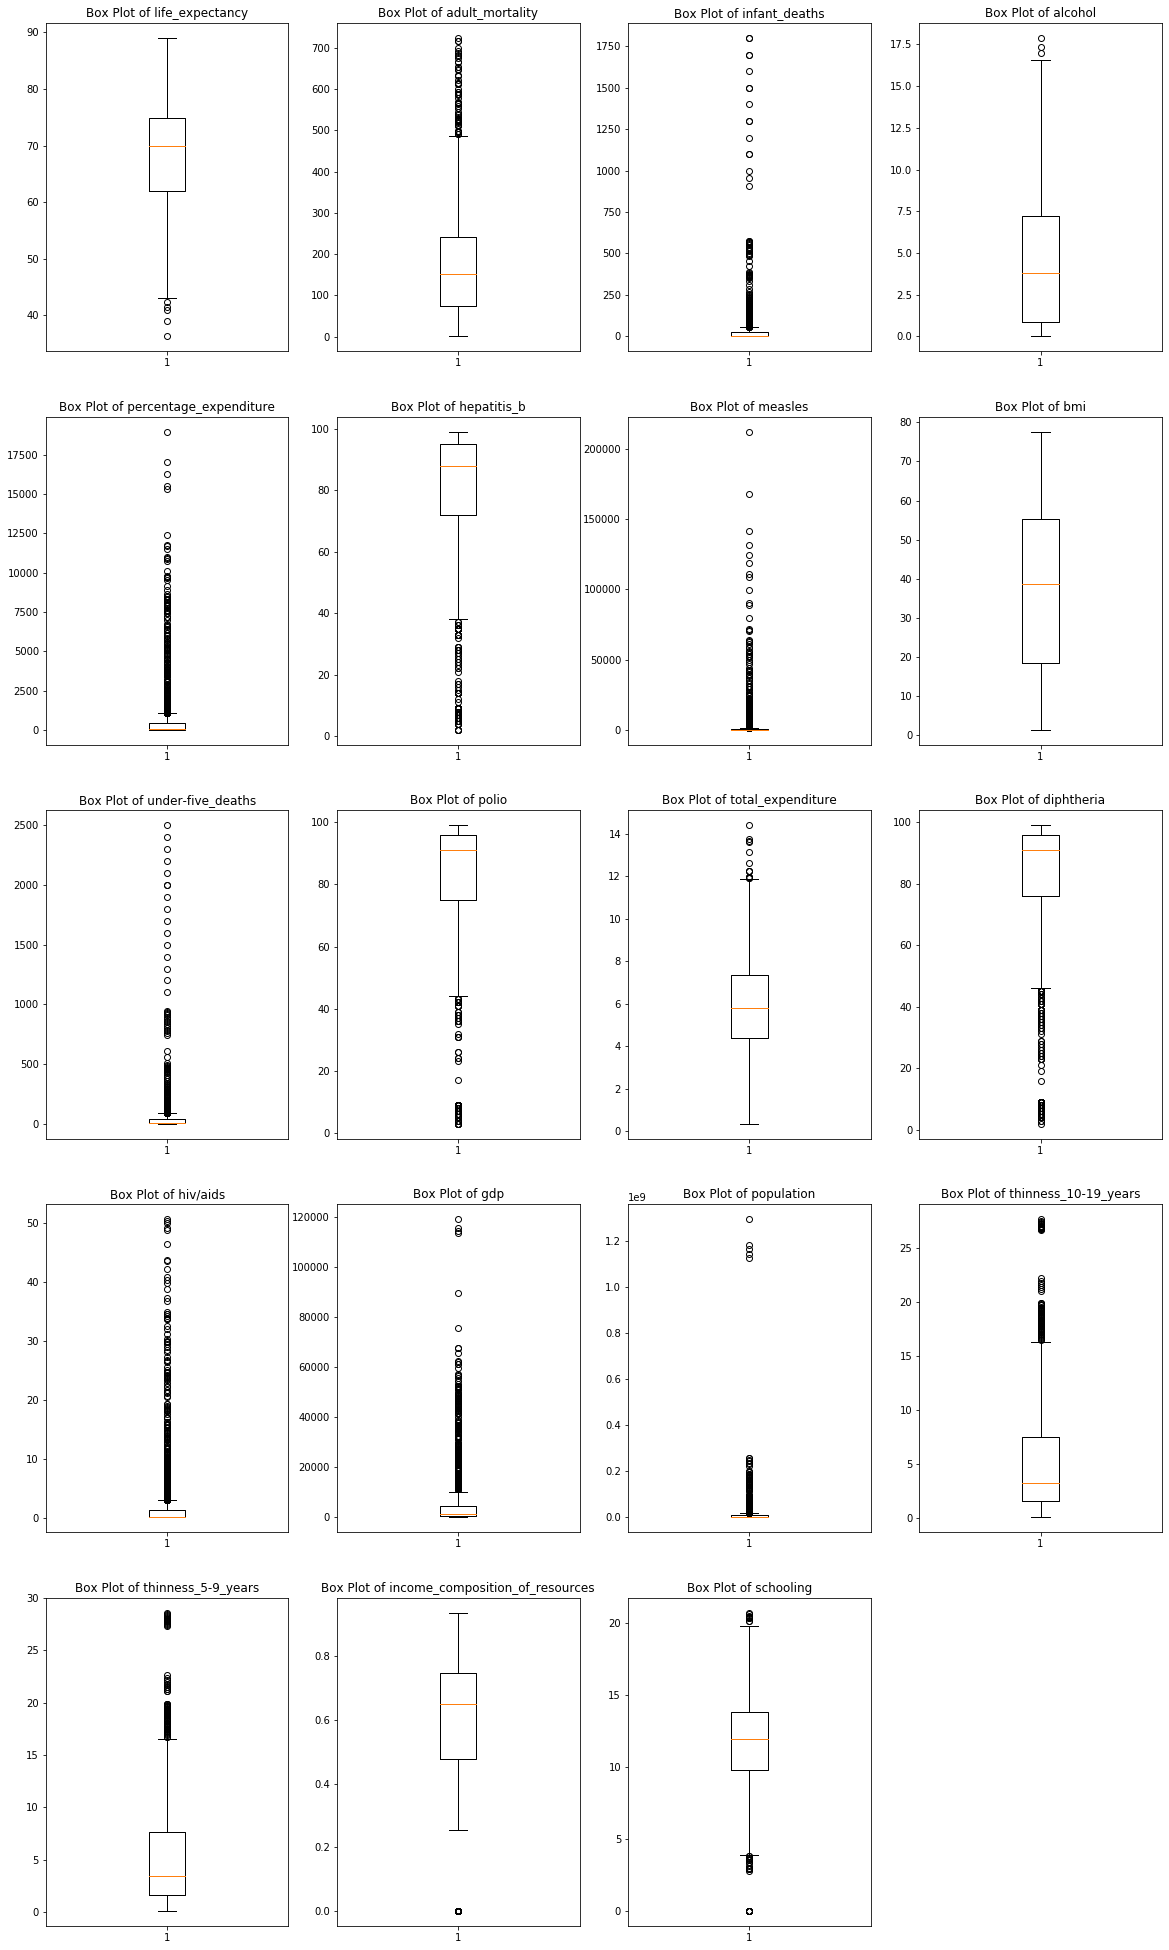

In [24]:
#We will use Winsorize method to treat the outliers
#First we will Visualize the outliers
# Create a dictionary of columns.
dict_c = {'life_expectancy':1,'adult_mortality':2,'infant_deaths':3,'alcohol':4,'percentage_expenditure':5,'hepatitis_b':6,'measles':7,'bmi':8,'under-five_deaths':9,'polio':10,'total_expenditure':11,'diphtheria':12,'hiv/aids':13,'gdp':14,'population':15,'thinness_10-19_years':16,'thinness_5-9_years':17,'income_composition_of_resources':18,'schooling':19}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,35))

for var,i in dict_c.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(df[var],whis=1.5)
                     plt.title('Box Plot of {}'.format(var))

plt.show()

In [25]:
#Calculate the no. of outliers and % of outliers in each variable/predictor
for pred in dict_c.keys():
    q75, q25 = np.percentile(df[pred], [75 ,25])
    iqr = q75 - q25

    min_val_pred = q25 - (iqr*1.5)
    max_val_pred = q75 + (iqr*1.5)
    print("Count of outliers and percentage of it in {} : {} and {}".format(pred,len((np.where((df[pred] > max_val_pred) | (df[pred] < min_val_pred))[0])),len((np.where((df[pred] > max_val_pred) | (df[pred] < min_val_pred))[0]))*100/2110))


Count of outliers and percentage of it in life_expectancy : 5 and 0.23696682464454977
Count of outliers and percentage of it in adult_mortality : 61 and 2.890995260663507
Count of outliers and percentage of it in infant_deaths : 225 and 10.663507109004739
Count of outliers and percentage of it in alcohol : 3 and 0.14218009478672985
Count of outliers and percentage of it in percentage_expenditure : 251 and 11.895734597156398
Count of outliers and percentage of it in hepatitis_b : 199 and 9.431279620853081
Count of outliers and percentage of it in measles : 392 and 18.578199052132703
Count of outliers and percentage of it in bmi : 0 and 0.0
Count of outliers and percentage of it in under-five_deaths : 248 and 11.753554502369669
Count of outliers and percentage of it in polio : 174 and 8.246445497630331
Count of outliers and percentage of it in total_expenditure : 14 and 0.6635071090047393
Count of outliers and percentage of it in diphtheria : 209 and 9.90521327014218
Count of outliers an

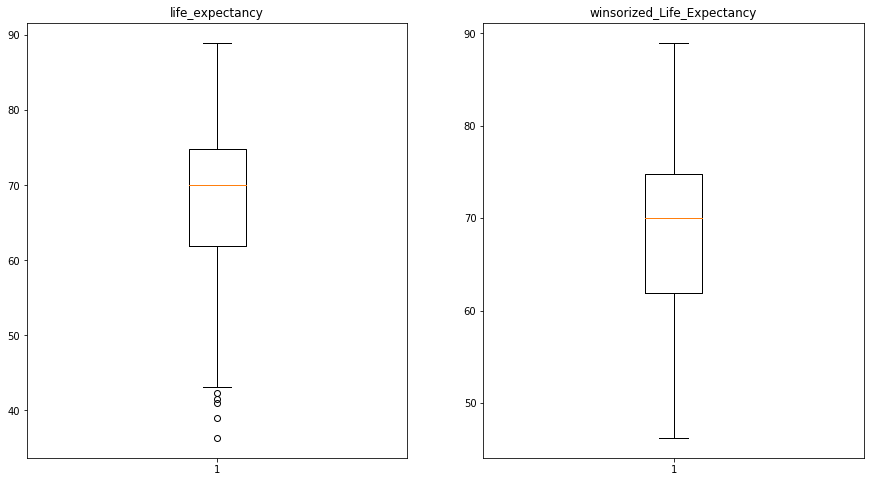

In [26]:
#In real life scenario, removing data is not wise, hence the criteria can be made a bit stringent by calculating outliers as 1.5* IQR to include most of the data.
# The outliers from the predictors is removed using the Winsorization method
#Winsorization is a way to minimize the influence of outliers in your data
# Plot of Life_Expectancy and Winsorize Life_Expectancy
from scipy.stats.mstats import winsorize
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
Life_Expectancy = df['life_expectancy']
plt.boxplot(Life_Expectancy)
plt.title("life_expectancy")

plt.subplot(1,2,2)
winsorized_Life_Expectancy = winsorize(df['life_expectancy'],(0.02,0),inplace=True)
plt.boxplot(winsorized_Life_Expectancy)
plt.title("winsorized_Life_Expectancy")

plt.show()

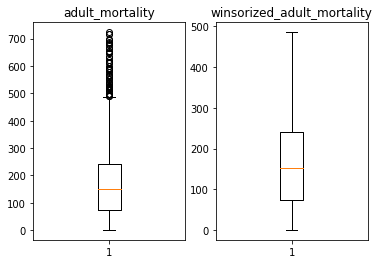

In [27]:
#Plot of Adult_Mortality and Winsorize Adult_Mortality
plt.subplot(1,2,1)
Adult_Mortality = df['adult_mortality']
plt.boxplot(Adult_Mortality)
plt.title("adult_mortality")

plt.subplot(1,2,2)
winsorized_Adult_Mortality = winsorize(df['adult_mortality'],(0,0.03),inplace=True)
plt.boxplot(winsorized_Adult_Mortality)
plt.title("winsorized_adult_mortality")

plt.show()

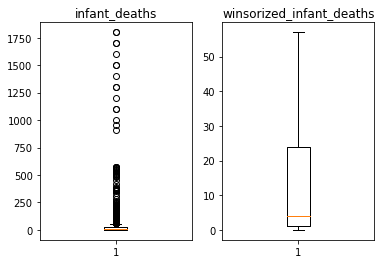

In [28]:
#Plot of Infant_Deaths and Winsorize Infant_Deaths
plt.subplot(1,2,1)
Infant_Deaths = df['infant_deaths']
plt.boxplot(Infant_Deaths)
plt.title("infant_deaths")

plt.subplot(1,2,2)
winsorized_Infant_Deaths = winsorize(df['infant_deaths'],(0,0.11),inplace=True)
plt.boxplot(winsorized_Infant_Deaths)
plt.title("winsorized_infant_deaths")

plt.show()

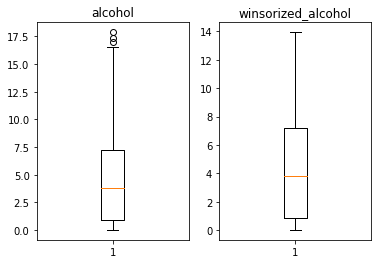

In [29]:
#Plot of Alcohol and Winsorize Alcohol
plt.subplot(1,2,1)
Alcohol = df['alcohol']
plt.boxplot(Alcohol)
plt.title("alcohol")

plt.subplot(1,2,2)
winsorized_Alcohol = winsorize(df['alcohol'],(0,0.01),inplace=True)
plt.boxplot(winsorized_Alcohol)
plt.title("winsorized_alcohol")

plt.show()

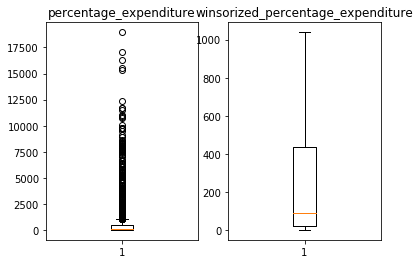

In [30]:
#Plot of Percentage Expenditure and Winsorize Percentage Expenditure
plt.subplot(1,2,1)
Percentage_Expenditure = df['percentage_expenditure']
plt.boxplot(Percentage_Expenditure)
plt.title("percentage_expenditure")

plt.subplot(1,2,2)
winsorized_Percentage_Expenditure = winsorize(df['percentage_expenditure'],(0,0.12),inplace=True)
plt.boxplot(winsorized_Percentage_Expenditure)
plt.title("winsorized_percentage_expenditure")

plt.show()

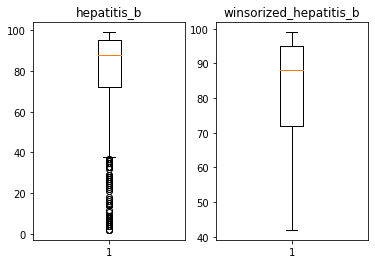

In [31]:
#Plot of Hepatitis B and Winsorize Hepatitis B
plt.subplot(1,2,1)
Hepatitis_B = df['hepatitis_b']
plt.boxplot(Hepatitis_B)
plt.title("hepatitis_b")

plt.subplot(1,2,2)
winsorized_Hepatitis_B = winsorize(df['hepatitis_b'],(0.10,0),inplace=True)
plt.boxplot(winsorized_Hepatitis_B)
plt.title("winsorized_hepatitis_b")

plt.show()

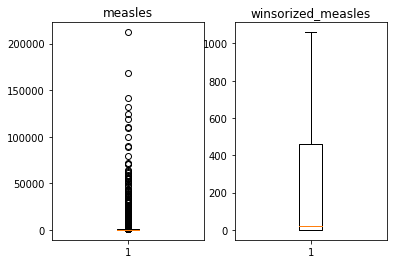

In [32]:
#Plot of Measles and Winsorize Measles
plt.subplot(1,2,1)
Measles = df['measles']
plt.boxplot(Measles)
plt.title("measles")

plt.subplot(1,2,2)
winsorized_Measles = winsorize(df['measles'],(0,0.19),inplace=True)
plt.boxplot(winsorized_Measles)
plt.title("winsorized_measles")

plt.show()

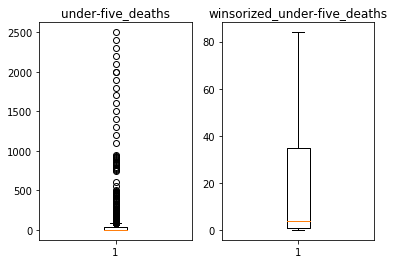

In [33]:
#Plot of Under-five_deaths and Winsorize Under-five_deaths
plt.subplot(1,2,1)
Under_five_deaths = df['under-five_deaths']
plt.boxplot(Under_five_deaths)
plt.title("under-five_deaths")

plt.subplot(1,2,2)
winsorized_Under_five_deaths = winsorize(df['under-five_deaths'],(0,0.12),inplace=True)
plt.boxplot(winsorized_Under_five_deaths)
plt.title("winsorized_under-five_deaths")

plt.show()

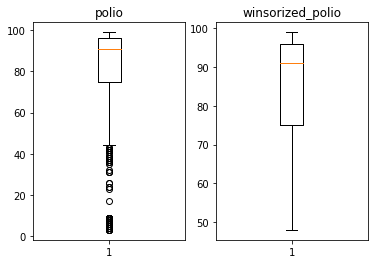

In [34]:
#Plot of Polio and Winsorize Under-five_deaths
plt.subplot(1,2,1)
polio = df['polio']
plt.boxplot(polio)
plt.title("polio")

plt.subplot(1,2,2)
winsorized_polio = winsorize(df['polio'],(0.10,0),inplace=True)
plt.boxplot(winsorized_polio)
plt.title("winsorized_polio")

plt.show()

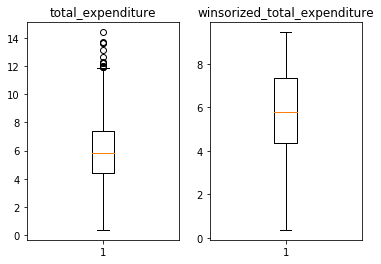

In [35]:
#Plot of total_expenditure and Winsorize total_expenditure
plt.subplot(1,2,1)
total_expenditure = df['total_expenditure']
plt.boxplot(total_expenditure)
plt.title("total_expenditure")

plt.subplot(1,2,2)
winsorized_total_expenditure = winsorize(df['total_expenditure'],(0,0.06),inplace=True)
plt.boxplot(winsorized_total_expenditure)
plt.title("winsorized_total_expenditure")

plt.show()

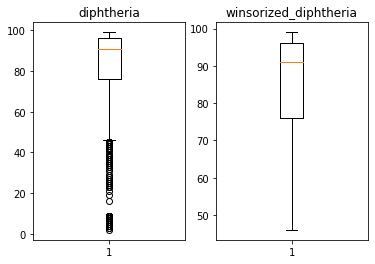

In [36]:
#Plot of diphtheria and Winsorize diphtheria
plt.subplot(1,2,1)
diphtheria = df['diphtheria']
plt.boxplot(diphtheria)
plt.title("diphtheria")

plt.subplot(1,2,2)
winsorized_diphtheria = winsorize(df['diphtheria'],(0.10,0),inplace=True)
plt.boxplot(winsorized_diphtheria)
plt.title("winsorized_diphtheria")

plt.show()

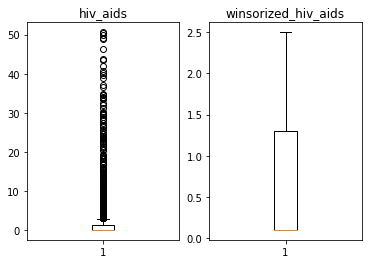

In [37]:
#Plot of hiv/aids and Winsorize hiv/aids
plt.subplot(1,2,1)
hiv_aids = df['hiv/aids']
plt.boxplot(hiv_aids)
plt.title("hiv_aids")

plt.subplot(1,2,2)
winsorized_hiv_aids = winsorize(df['hiv/aids'],(0,0.18),inplace=True)
plt.boxplot(winsorized_hiv_aids)
plt.title("winsorized_hiv_aids")

plt.show()

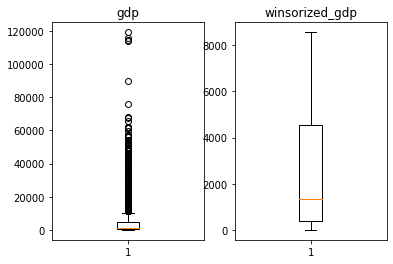

In [38]:
#Plot of gdp and Winsorize gdp
plt.subplot(1,2,1)
gdp = df['gdp']
plt.boxplot(gdp)
plt.title("gdp")

plt.subplot(1,2,2)
winsorized_gdp = winsorize(df['gdp'],(0,0.14),inplace=True)
plt.boxplot(winsorized_gdp)
plt.title("winsorized_gdp")

plt.show()

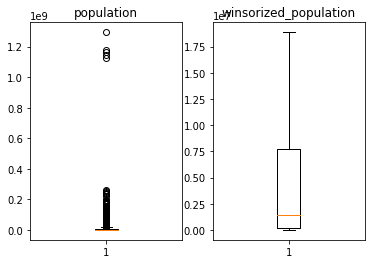

In [39]:
#Plot of population and Winsorize population
plt.subplot(1,2,1)
population = df['population']
plt.boxplot(population)
plt.title("population")

plt.subplot(1,2,2)
winsorized_population = winsorize(df['population'],(0,0.13),inplace=True)
plt.boxplot(winsorized_population)
plt.title("winsorized_population")

plt.show()

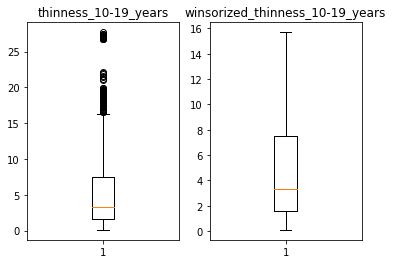

In [40]:
#Plot of thinness_10-19_years and Winsorize thinness_10-19_years
plt.subplot(1,2,1)
thinness_10_19_years = df['thinness_10-19_years']
plt.boxplot(thinness_10_19_years)
plt.title("thinness_10-19_years")

plt.subplot(1,2,2)
winsorized_thinness_10_19_years = winsorize(df['thinness_10-19_years'],(0,0.04),inplace=True)
plt.boxplot(winsorized_thinness_10_19_years)
plt.title("winsorized_thinness_10-19_years")

plt.show()

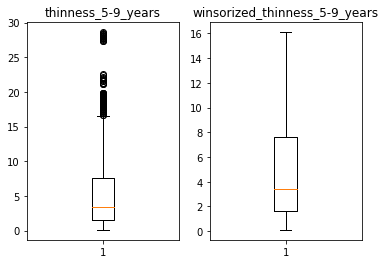

In [41]:
#Plot of thinness_5-9_years and Winsorize thinness_5-9_years
plt.subplot(1,2,1)
thinness_5_9_years = df['thinness_5-9_years']
plt.boxplot(thinness_5_9_years)
plt.title("thinness_5-9_years")

plt.subplot(1,2,2)
winsorized_thinness_5_9_years = winsorize(df['thinness_5-9_years'],(0,0.04),inplace=True)
plt.boxplot(winsorized_thinness_5_9_years)
plt.title("winsorized_thinness_5-9_years")

plt.show()

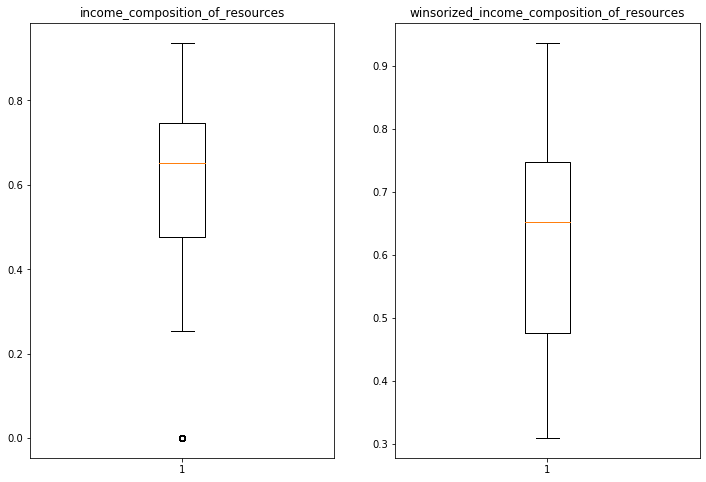

In [42]:
#Plot of income_composition_of_resources and Winsorize income_composition_of_resources
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
income_composition_of_resources = df['income_composition_of_resources']
plt.boxplot(income_composition_of_resources)
plt.title("income_composition_of_resources")

plt.subplot(1,2,2)
winsorized_income_composition_of_resources = winsorize(df['income_composition_of_resources'],(0.06,0),inplace=True)
plt.boxplot(winsorized_income_composition_of_resources)
plt.title("winsorized_income_composition_of_resources")

plt.show()

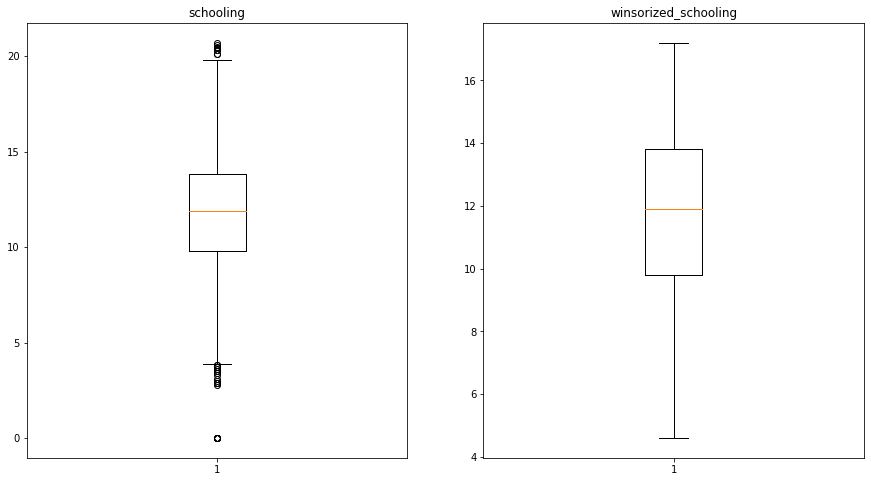

In [43]:
#Plot of schooling and Winsorize schooling
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
schooling = df['schooling']
plt.boxplot(schooling)
plt.title("schooling")

plt.subplot(1,2,2)
winsorized_schooling = winsorize(df['schooling'],(0.02,0.02),inplace=True)
plt.boxplot(winsorized_schooling)
plt.title("winsorized_schooling")

plt.show()

In [171]:
#After winsorization the outliers of all predictors have been removed as seen in their winsorized plots
#We will add these new winsorized predictors to the dataframe
df['winsorized_Life_Expectancy']=winsorized_Life_Expectancy
df['winsorized_Adult_Mortality']=winsorized_Adult_Mortality
df['winsorized_Infant_Deaths']=winsorized_Infant_Deaths
df['winsorized_Alcohol']=winsorized_Alcohol
df['winsorized_Percentage_Expenditure']=winsorized_Percentage_Expenditure
df['winsorized_Hepatitis_B']=winsorized_Hepatitis_B
df['winsorized_Measles']=winsorized_Measles
df['winsorized_Under_five_deaths']=winsorized_Under_five_deaths
df['winsorized_polio']=winsorized_polio
df['winsorized_total_expenditure']=winsorized_total_expenditure
df['winsorized_diphtheria']=winsorized_diphtheria
df['winsorized_hiv_aids']=winsorized_hiv_aids
df['winsorized_gdp']=winsorized_gdp
df['winsorized_population']=winsorized_population
df['winsorized_thinness_10_19_years']=winsorized_thinness_10_19_years
df['winsorized_thinness_5_9_years']=winsorized_thinness_5_9_years
df['winsorized_income_composition_of_resources']=winsorized_income_composition_of_resources
df['winsorized_schooling']=winsorized_schooling


In [45]:
df.describe()
df.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_10-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling',
       'winsorized_Life_Expectancy', 'winsorized_Adult_Mortality',
       'winsorized_Infant_Deaths', 'winsorized_Alcohol',
       'winsorized_Percentage_Expenditure', 'winsorized_Hepatitis_B',
       'winsorized_Measles', 'winsorized_Under_five_deaths',
       'winsorized_polio', 'winsorized_total_expenditure',
       'winsorized_diphtheria', 'winsorized_hiv_aids', 'winsorized_gdp',
       'winsorized_population', 'winsorized_thinness_10_19_years',
       'winsorized_thinness_5_9_years',
       'winsorized_income_composition_of_resources', 'winsorized_schooling'],
      dtype='object')

In [46]:
df.shape

(2110, 40)

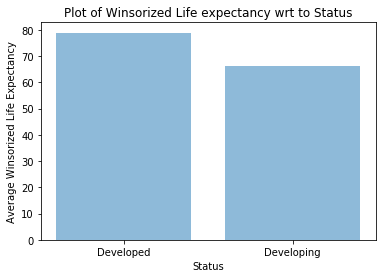

In [47]:
#Plot Life Expectancy wrt to Status
plt.bar(df.groupby('status')['status'].count().index, df.groupby('status')['winsorized_Life_Expectancy'].mean(), align='center', alpha=0.5)
plt.xlabel('Status')
plt.ylabel('Average Winsorized Life Expectancy')
plt.title('Plot of Winsorized Life expectancy wrt to Status')
plt.show()
#This shows developed nations has more average life expectancy as compared to developing nations

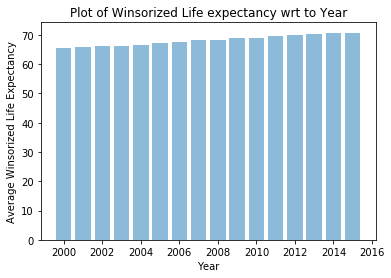

In [48]:
#Plot Life Expectancy wrt to Year
plt.bar(df.groupby('year')['year'].count().index, df.groupby('year')['winsorized_Life_Expectancy'].mean(), align='center', alpha=0.5)
plt.xlabel('Year')
plt.ylabel('Average Winsorized Life Expectancy')
plt.title('Plot of Winsorized Life expectancy wrt to Year')
plt.show()
#This shows Life Expectancy increases with year for all the countries

Text(0.5, 1.0, 'LifeExpectancy vs AdultMortality')

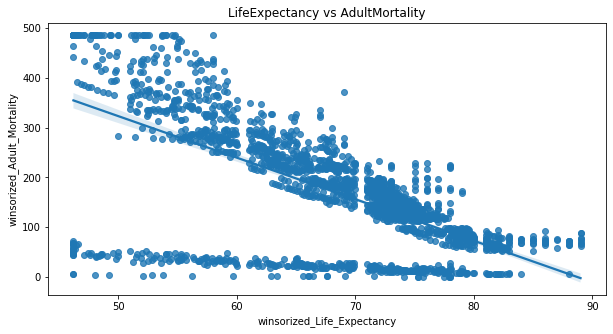

In [49]:
#Scatterplot between Winsorized Adult Mortality & Life Expectancy
plt.figure(figsize=(10,5))
sns.regplot(x=df['winsorized_Life_Expectancy'],y=df['winsorized_Adult_Mortality'],data=df)
plt.title("LifeExpectancy vs AdultMortality")

Text(0.5, 1.0, 'LifeExpectancy vs InfantDeaths')

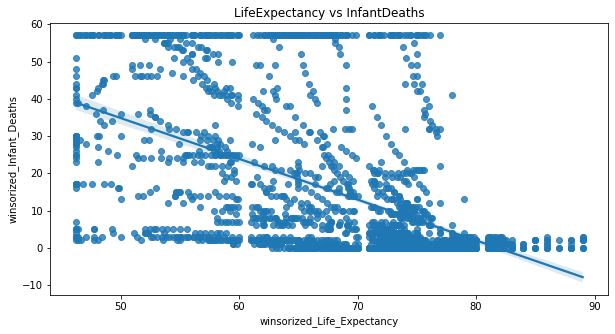

In [50]:
#Scatterplot between Winsorized Infant_Deaths & Life Expectancy
plt.figure(figsize=(10,5))
sns.regplot(x=df['winsorized_Life_Expectancy'],y=df['winsorized_Infant_Deaths'],data=df)
plt.title("LifeExpectancy vs InfantDeaths")

Text(0.5, 1.0, 'LifeExpectancy vs Alcohol')

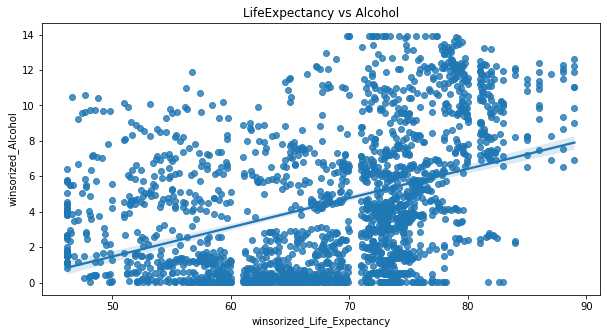

In [51]:
#Scatterplot between Winsorized Alcohol & Life Expectancy
plt.figure(figsize=(10,5))
sns.regplot(x=df['winsorized_Life_Expectancy'],y=df['winsorized_Alcohol'],data=df)
plt.title("LifeExpectancy vs Alcohol")

Text(0.5, 1.0, 'LifeExpectancy vs Percentage_Expenditure')

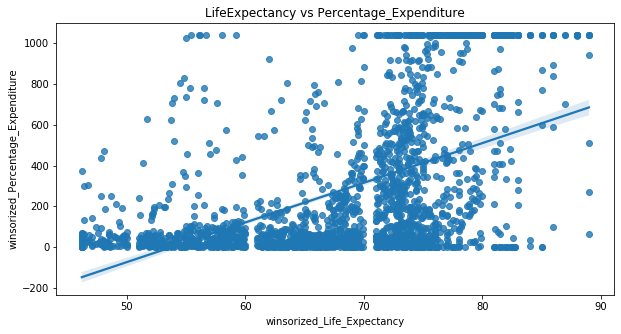

In [52]:
#Scatterplot between Winsorized Percentage_Expenditure & Life Expectancy
plt.figure(figsize=(10,5))
sns.regplot(x=df['winsorized_Life_Expectancy'],y=df['winsorized_Percentage_Expenditure'],data=df)
plt.title("LifeExpectancy vs Percentage_Expenditure")

Text(0.5, 1.0, 'LifeExpectancy vs Hepatitis_B')

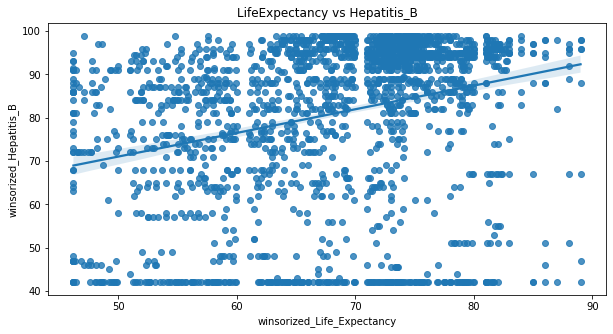

In [53]:
#Scatterplot between Winsorized Hepatitis_B & Life Expectancy
plt.figure(figsize=(10,5))
sns.regplot(x=df['winsorized_Life_Expectancy'],y=df['winsorized_Hepatitis_B'],data=df)
plt.title("LifeExpectancy vs Hepatitis_B")

Text(0.5, 1.0, 'LifeExpectancy vs Measles')

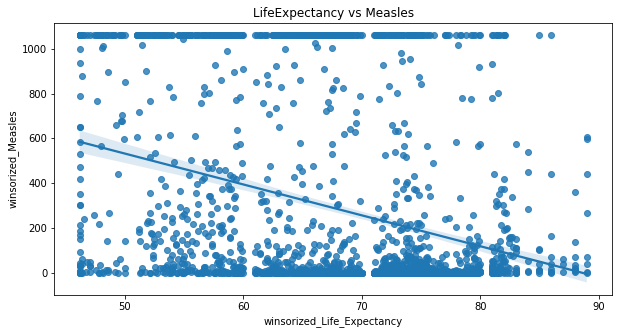

In [54]:
#Scatterplot between Winsorized Measles & Life Expectancy
plt.figure(figsize=(10,5))
sns.regplot(x=df['winsorized_Life_Expectancy'],y=df['winsorized_Measles'],data=df)
plt.title("LifeExpectancy vs Measles")

Text(0.5, 1.0, 'LifeExpectancy vs Under_five_deaths')

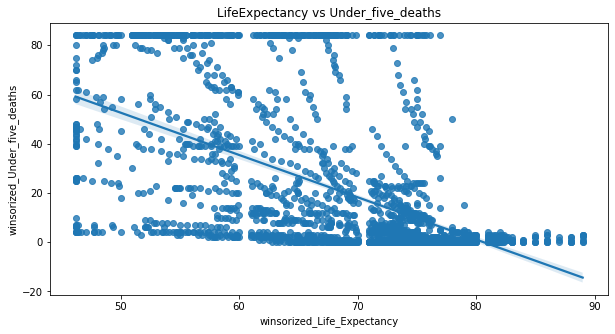

In [55]:
#Scatterplot between Winsorized Under_five_deaths & Life Expectancy
plt.figure(figsize=(10,5))
sns.regplot(x=df['winsorized_Life_Expectancy'],y=df['winsorized_Under_five_deaths'],data=df)
plt.title("LifeExpectancy vs Under_five_deaths")

Text(0.5, 1.0, 'LifeExpectancy vs polio')

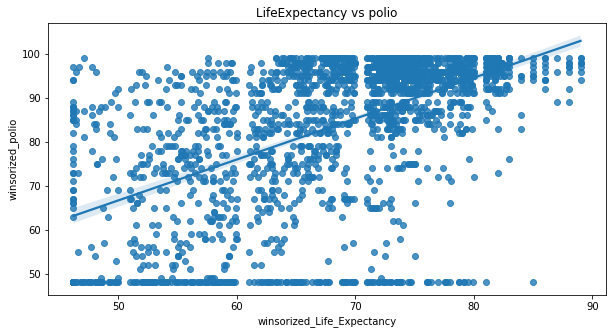

In [56]:
#Scatterplot between Winsorized polio & Life Expectancy
plt.figure(figsize=(10,5))
sns.regplot(x=df['winsorized_Life_Expectancy'],y=df['winsorized_polio'],data=df)
plt.title("LifeExpectancy vs polio")

Text(0.5, 1.0, 'LifeExpectancy vs total_expenditure')

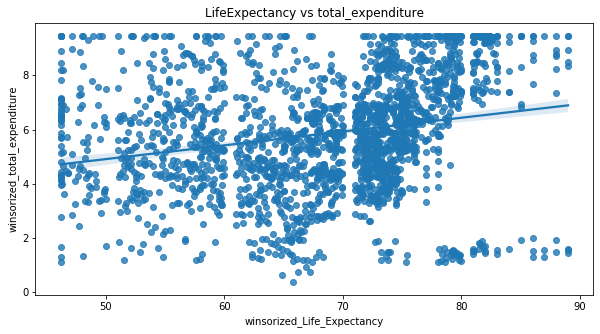

In [57]:
#Scatterplot between Winsorized total_expenditure & Life Expectancy
plt.figure(figsize=(10,5))
sns.regplot(x=df['winsorized_Life_Expectancy'],y=df['winsorized_total_expenditure'],data=df)
plt.title("LifeExpectancy vs total_expenditure")

Text(0.5, 1.0, 'LifeExpectancy vs diphtheria')

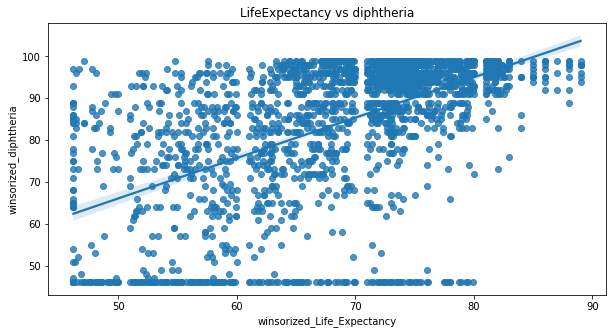

In [58]:
#Scatterplot between Winsorized diphtheria & Life Expectancy
plt.figure(figsize=(10,5))
sns.regplot(x=df['winsorized_Life_Expectancy'],y=df['winsorized_diphtheria'],data=df)
plt.title("LifeExpectancy vs diphtheria")

Text(0.5, 1.0, 'LifeExpectancy vs hiv_aids')

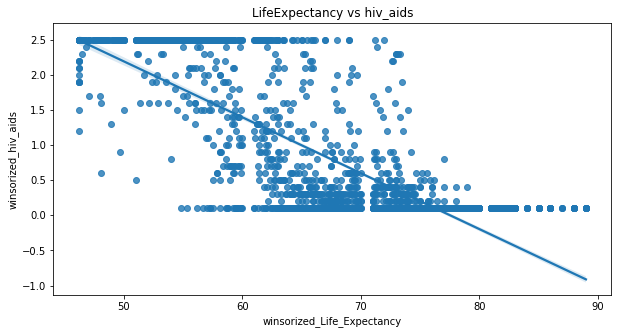

In [59]:
#Scatterplot between Winsorized hiv_aids & Life Expectancy
plt.figure(figsize=(10,5))
sns.regplot(x=df['winsorized_Life_Expectancy'],y=df['winsorized_hiv_aids'],data=df)
plt.title("LifeExpectancy vs hiv_aids")

Text(0.5, 1.0, 'LifeExpectancy vs gdp')

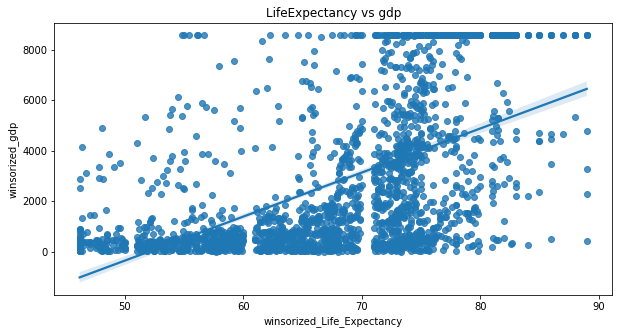

In [60]:
#Scatterplot between Winsorized gdp & Life Expectancy
plt.figure(figsize=(10,5))
sns.regplot(x=df['winsorized_Life_Expectancy'],y=df['winsorized_gdp'],data=df)
plt.title("LifeExpectancy vs gdp")

Text(0.5, 1.0, 'LifeExpectancy vs population')

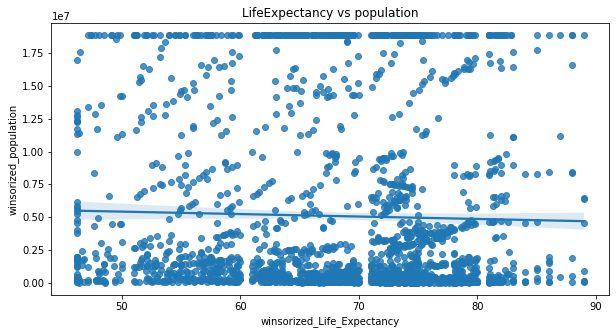

In [61]:
#Scatterplot between Winsorized population & Life Expectancy
plt.figure(figsize=(10,5))
sns.regplot(x=df['winsorized_Life_Expectancy'],y=df['winsorized_population'],data=df)
plt.title("LifeExpectancy vs population")

Text(0.5, 1.0, 'LifeExpectancy vs thinness_10_19_years')

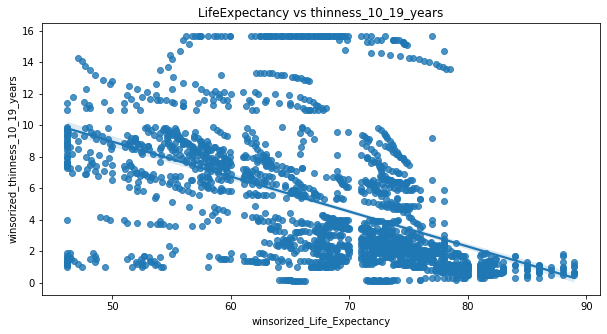

In [62]:
#Scatterplot between Winsorized thinness_10_19_years & Life Expectancy
plt.figure(figsize=(10,5))
sns.regplot(x=df['winsorized_Life_Expectancy'],y=df['winsorized_thinness_10_19_years'],data=df)
plt.title("LifeExpectancy vs thinness_10_19_years")

Text(0.5, 1.0, 'LifeExpectancy vs thinness_10_19_years')

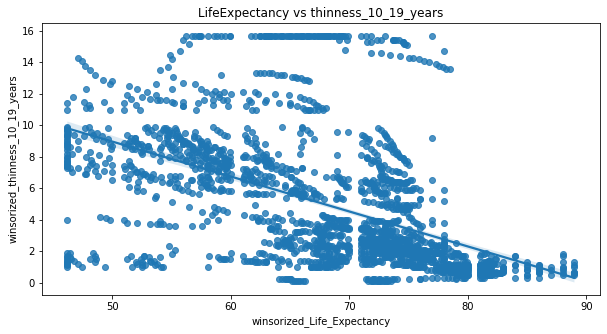

In [63]:
#Scatterplot between Winsorized thinness_10_19_years & Life Expectancy
plt.figure(figsize=(10,5))
sns.regplot(x=df['winsorized_Life_Expectancy'],y=df['winsorized_thinness_10_19_years'],data=df)
plt.title("LifeExpectancy vs thinness_10_19_years")

Text(0.5, 1.0, 'LifeExpectancy vs thinness_5_9_years')

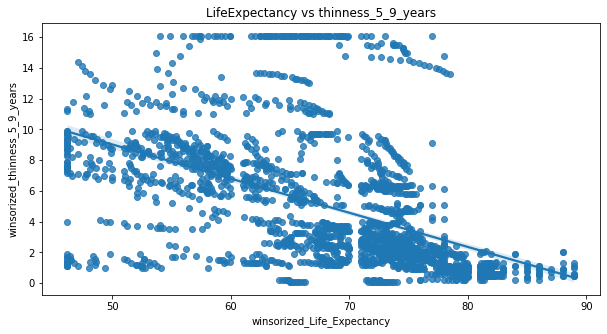

In [64]:
#Scatterplot between Winsorized thinness_5_9_years & Life Expectancy
plt.figure(figsize=(10,5))
sns.regplot(x=df['winsorized_Life_Expectancy'],y=df['winsorized_thinness_5_9_years'],data=df)
plt.title("LifeExpectancy vs thinness_5_9_years")

Text(0.5, 1.0, 'LifeExpectancy vs income_composition_of_resources')

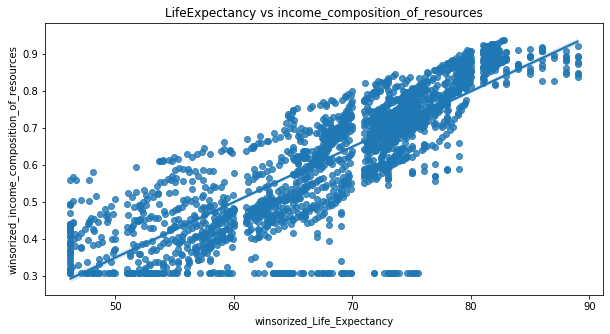

In [65]:
#Scatterplot between Winsorized income_composition_of_resources & Life Expectancy
plt.figure(figsize=(10,5))
sns.regplot(x=df['winsorized_Life_Expectancy'],y=df['winsorized_income_composition_of_resources'],data=df)
plt.title("LifeExpectancy vs income_composition_of_resources")

Text(0.5, 1.0, 'LifeExpectancy vs schooling')

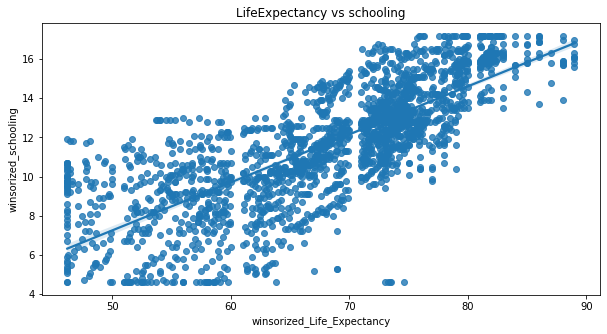

In [66]:
#Scatterplot between Winsorized schooling & Life Expectancy
plt.figure(figsize=(10,5))
sns.regplot(x=df['winsorized_Life_Expectancy'],y=df['winsorized_schooling'],data=df)
plt.title("LifeExpectancy vs schooling")

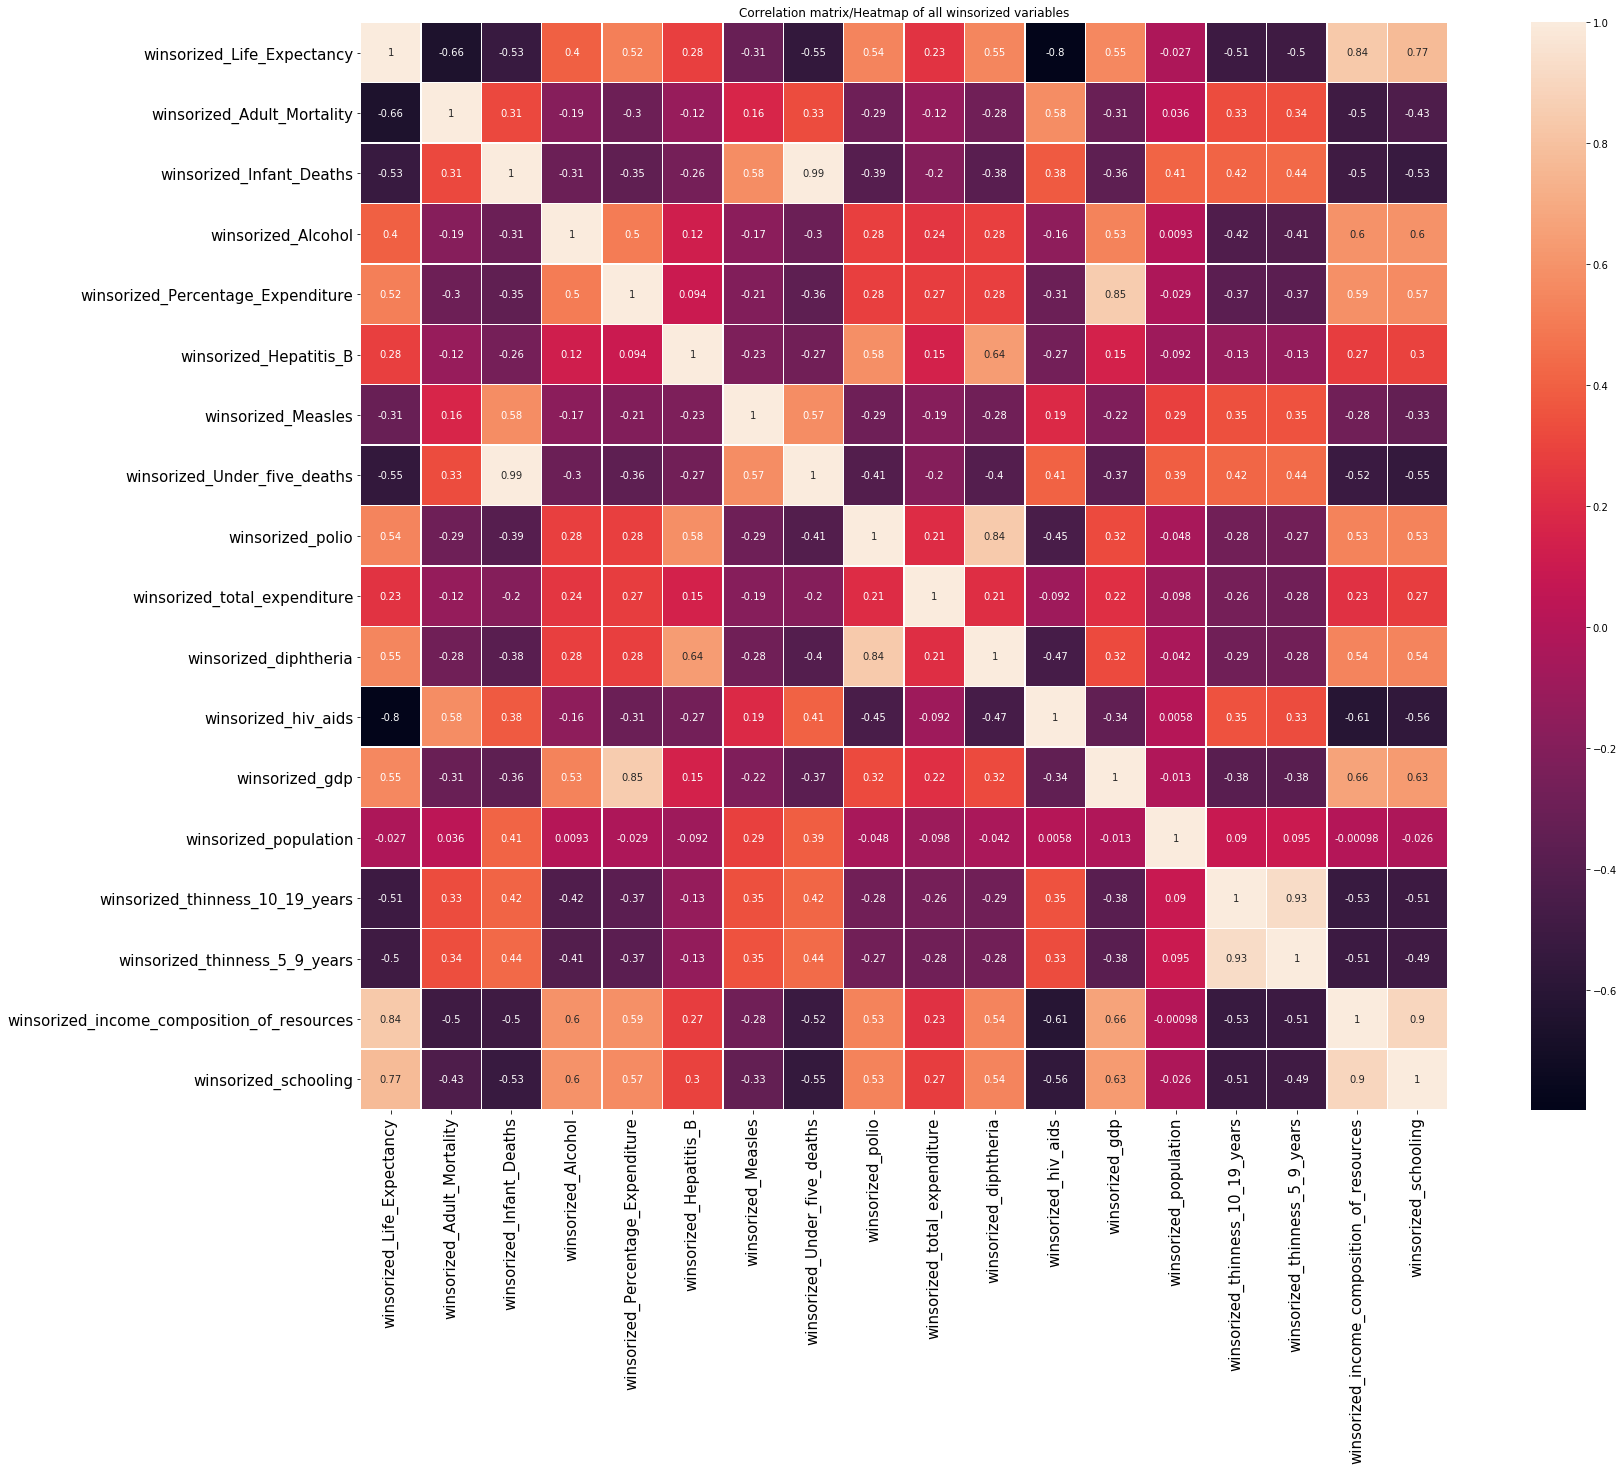

In [67]:
df.columns
wdf = df.iloc[:,22:]
wdf['country'] = df['country']
wdf['year'] = df['year']
wdf['status'] = df['status']
wdf_final = wdf.iloc[:,:-3]
cmatrix = wdf_final.corr()

plt.figure(figsize=(30,20))
plt.tick_params(axis='both',labelsize=15)
sns.heatmap(cmatrix, square=True, annot=True, linewidths=.5)
plt.title("Correlation matrix/Heatmap of all winsorized variables")
plt.show()

### From the above matrix it is understood the following variables are correlated to winsorized_Life_Expectancy:
### winsorized_Percentage_expenditure,winsorized_polio,winsorized_diphtheria,winsorized_gdp,winsorized_income_composition_of_resources,winsorized_schooling
### winsorized_Adult_Mortality and winsorized_hiv_aids are highly nehatively correlated with winsorized_Life_Expectancy
### Also some variables are correlated to each other like, winsorized_schooling and winsorized_income_composition_of_resources,
### winsorized_Infant_Deaths with winsorized_Under_five_deaths, winsorized_gdp with winsorized_Percentage_expenditure, winsorized_thinness_10_19_years with winsorized_thinness_5_9_years 
### Features should not be correlated with each other. We drop those features/variables wrt to their corrrelation with our target variable ie. winsorized_Life_Expectancy
### Categorical columns like 'country' and 'year' have been dropped because they don't affect the life expectency much

In [68]:
#We create a new dataframe having variables/features having high correlation(positive and negative greater than +/- 0.6) with the target variable ie. winsorized_Life_Expectancy
new_df= wdf[['status','winsorized_Life_Expectancy','winsorized_Adult_Mortality','winsorized_income_composition_of_resources','winsorized_schooling','winsorized_hiv_aids']]

In [69]:
#Converting the categorical variable 'status' into numerical using one hot encoding method
new_df = new_df.join(pd.get_dummies(new_df.status)).drop(columns='status').copy()
new_df.head()

,winsorized_Life_Expectancy,winsorized_Adult_Mortality,winsorized_income_composition_of_resources,winsorized_schooling,winsorized_hiv_aids,Developed,Developing
0,65.0,263.0,0.479,10.1,0.1,0,1
1,59.9,271.0,0.476,10.0,0.1,0,1
2,59.9,268.0,0.470,9.9,0.1,0,1
3,59.5,272.0,0.463,9.8,0.1,0,1
4,59.2,275.0,0.454,9.5,0.1,0,1


## Regression Task

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
X = new_df[['winsorized_Adult_Mortality', 'winsorized_income_composition_of_resources', 'winsorized_schooling', 'winsorized_hiv_aids', 'Developed', 'Developing']]
y = new_df['winsorized_Life_Expectancy']
# split into training and test data set 
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

### Linear Regression

In [71]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

lr = LinearRegression().fit(X_train, y_train)
cv_scores = cross_val_score(lr, X_train, y_train)

# Mean Cross validation Score
print("Cross-validation scores: {}".format(cv_scores))
print("Average Cross-validation scores: {:.2f}".format(cv_scores.mean()))
# Print Co-efficients
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

# Check test data set performance
print("Linear Regression Train Performance: ", lr.score(X_train,y_train))
print("Linear Regression Test Performance: ", lr.score(X_test,y_test))


Cross-validation scores: [0.84725494 0.84439423 0.84424284 0.84965579 0.86626753]
Average Cross-validation scores: 0.85
lr.coef_: [-6.45356001 16.1076023   1.93862132 -9.19678297  0.51057393 -0.51057393]
lr.intercept_: 64.1989986675439
Linear Regression Train Performance:  0.8510018584564221
Linear Regression Test Performance:  0.865342746153609


## Polynomial Regression

In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing  import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression


poly = PolynomialFeatures()
lreg = LinearRegression()

#define a list of parameters
param_poly = {'polynomialfeatures__degree':range(1,3)}

pipe_poly = make_pipeline(PolynomialFeatures(), LinearRegression())
grid_poly = GridSearchCV(pipe_poly, param_poly,cv=10, return_train_score = True, scoring='r2')
grid_poly.fit(X_train, y_train)

#find best parameters
print("Best Mean Cross-validation score: {:}".format(grid_poly.best_score_))
print('Best Parameters: ', grid_poly.best_params_)
print()

# Check data set performance
print("Linear Polynomial Train Performance: ", grid_poly.score(X_train,y_train))
print("Linear Polynomial Test Performance: ", grid_poly.score(X_test,y_test))

Best Mean Cross-validation score: 0.9071981397450173
Best Parameters:  {'polynomialfeatures__degree': 2}

Linear Polynomial Train Performance:  0.9113058095670948
Linear Polynomial Test Performance:  0.9221701575417988


In [73]:
from sklearn.model_selection import cross_val_score
poly = PolynomialFeatures(2)
X_trainpoly = poly.fit_transform(X_train_org)
X_testpoly = poly.fit_transform(X_test_org)

score = cross_val_score (lreg, X_trainpoly, y_train, cv = 5, scoring = 'r2')
print( " Train r2 CrossVal score: {}".format ( score ))
print( "Train Avg CrossVal score: {:.2f}".format ( score.mean()))

score = cross_val_score (lreg, X_testpoly, y_test, cv = 5, scoring = 'r2')
print( " Test r2 CrossVal score: {}".format ( score))
print( "Test Avg CrossVal score: {:.2f}".format ( score.mean()))

 Train r2 CrossVal score: [0.91934879 0.89641713 0.90408544 0.90690267 0.91822806]
Train Avg CrossVal score: 0.91
 Test r2 CrossVal score: [0.92282305 0.89865113 0.94417598 0.92362548 0.90395512]
Test Avg CrossVal score: 0.92


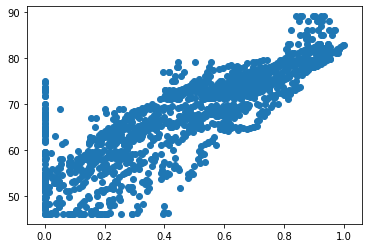

In [74]:
X_train_1 = X_train[:,1].reshape(-1,1)
plt.scatter(X_train_1,y_train)

train_score_list = []
test_score_list = []

for n in range(1,3):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    lreg.fit(X_train_poly, y_train)
    train_score_list.append(lreg.score(X_train_poly, y_train))
    test_score_list.append(lreg.score(X_test_poly, y_test))

In [75]:
print(train_score_list)
print(test_score_list)

[0.8510018584564221, 0.9113058095670948]
[0.865342746153609, 0.9221701575417988]


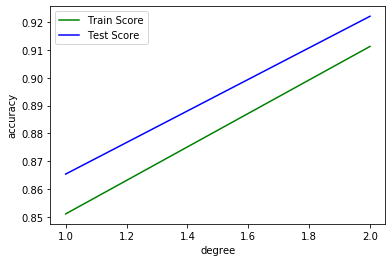

In [76]:
%matplotlib inline

x_axis = range(1,3)
plt.plot(x_axis, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_list, c = 'b', label = 'Test Score')
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.legend()

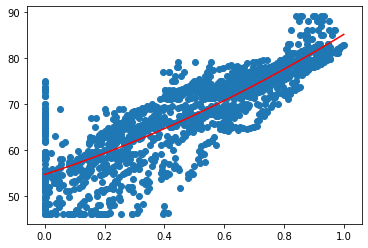

In [77]:
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train_1)
lreg.fit(X_train_poly, y_train)

x_axis = np.linspace(0,1,100).reshape(-1,1)
x_poly = poly.transform(x_axis)
y_predict = lreg.predict(x_poly)

X_train_1 = X_train[:,1].reshape(-1,1)
plt.scatter(X_train_1,y_train)
plt.plot(x_axis, y_predict, c = 'r')

## KNN Regressor

In [78]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix
X_train_org, X_test_org, y_train, y_test = train_test_split (X, y, test_size=.25, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

knn_range = list(range(1, 21))
param_grid = dict(n_neighbors=knn_range)
print(param_grid)

grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=10, return_train_score = True,scoring='r2')

grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Highest CrossVal score: {:.2f}".format(grid_search.best_score_))

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]}
Best parameters: {'n_neighbors': 2}
Highest CrossVal score: 0.94


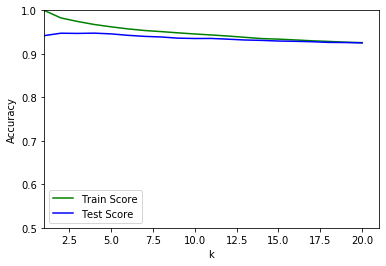

In [79]:
%matplotlib inline
train_array = []
test_array = []

for k in range(1,21):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train, y_train)
    train_array.append(knn_reg.score(X_train, y_train))
    test_array.append(knn_reg.score(X_test, y_test))

x_axis = range(1,21)
plt.plot(x_axis, train_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_array, c = 'b', label = 'Test Score')
plt.axis([1, 21, 0.5, 1])
plt.legend()
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

In [80]:
score = cross_val_score (KNeighborsRegressor(n_neighbors = 2), X_train_org, y_train, cv = 5, scoring = 'r2')
print( " Train r2 CrossVal score: {}".format ( score ))
print( "Train Avg CrossVal score: {:.2f}".format ( score.mean()))

score = cross_val_score (KNeighborsRegressor(n_neighbors = 2), X_test_org, y_test, cv = 5, scoring = 'r2')
print( " Test r2 CrossVal score: {}".format ( score))
print( "Test Avg CrossVal score: {:.2f}".format ( score.mean()))

 Train r2 CrossVal score: [0.92274603 0.89303802 0.91599285 0.92373865 0.90972788]
Train Avg CrossVal score: 0.91
 Test r2 CrossVal score: [0.89365134 0.89661277 0.87558387 0.81757192 0.82642548]
Test Avg CrossVal score: 0.86


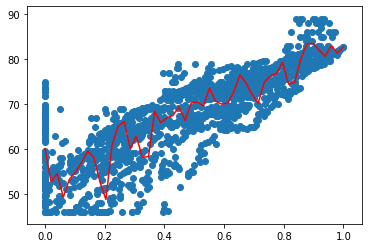

In [81]:
X_b = X_train[:,1].reshape(-1,1)
y_b = y_train[:]

knn_reg = KNeighborsRegressor(2)
knn_reg.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max()).reshape(50, 1)
y_predict = knn_reg.predict(X_new)

plt.plot(X_new, y_predict, c = 'r')
plt.scatter(X_b, y_b)

## Ridge Regression

In [82]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))


Training set score: 0.85
Test set score: 0.87


In [83]:
ridge = Ridge()

#define a list of parameters
param_ridge = {'alpha':[0.001, 0.01, 0.1, 1, 10, 100] }

grid_ridge = GridSearchCV(ridge, param_ridge, cv=5, return_train_score = True)
grid_ridge.fit(X_train, y_train)

grid_ridge_train_score = grid_ridge.score(X_train, y_train)
grid_ridge_test_score = grid_ridge.score(X_test, y_test)

print('Training set score: ', grid_ridge_train_score)
print('Test set score: ', grid_ridge_test_score)

#find best parameters
print('best parameters:',grid_ridge.best_params_)
print('Best cross-validation score:', grid_ridge.best_score_)

Training set score:  0.8510018583887452
Test set score:  0.865343647404115
best parameters: {'alpha': 0.001}
Best cross-validation score: 0.850363065438666


In [84]:
x_range = [0.001, 0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    train_score_list.append(ridge.score(X_train,y_train))
    test_score_list.append(ridge.score(X_test, y_test))

Text(0.5, 0, '$\\alpha$')

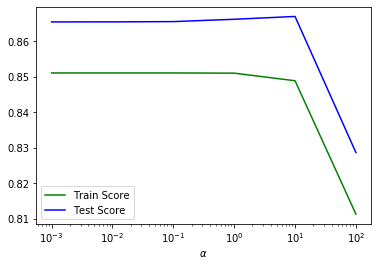

In [85]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [86]:
print(train_score_list)
print(test_score_list)

[0.8510018583887452, 0.8510018516996586, 0.8510011935478008, 0.8509447186841003, 0.84881301826238, 0.8113315616659963]
[0.865343647404115, 0.8653517422229171, 0.8654310856925183, 0.8660838318287576, 0.8668802807138304, 0.8286361421609869]


In [87]:
ridge = Ridge(alpha = 0.001)
ridge.fit(X_train,y_train)
print('Train score: {:.4f}'.format(ridge.score(X_train,y_train)))
print('Test score: {:.4f}'.format(ridge.score(X_test, y_test)))

Train score: 0.8510
Test score: 0.8653


In [88]:
ridge.coef_


array([-6.45357155, 16.10688968,  1.93923348, -9.19681791,  0.51060641,
       -0.51060641])

In [89]:
ridge.intercept_

64.19904403073943

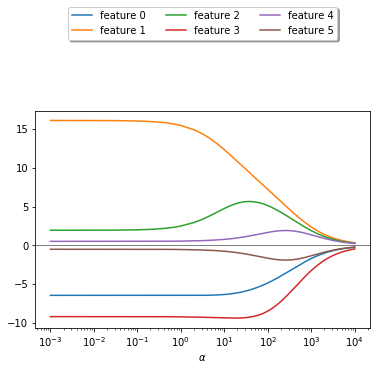

In [90]:
%matplotlib inline
import numpy as np

x_range1 = np.linspace(0.001, 1, 100).reshape(-1,1)
x_range2 = np.linspace(1, 10000, 10000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

for i in range(0,6):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

## Lasso Regression

In [91]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso.coef_ != 0))

Training set score: 0.68
Test set score: 0.69
Number of features used: 2


In [92]:
lasso = Lasso(max_iter=1000, tol = 1e-5)

#define a list of parameters
param_lasso = {'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10] }

grid_lasso = GridSearchCV(lasso, param_lasso, cv=5, return_train_score = True)
grid_lasso.fit(X_train, y_train)

grid_lasso_train_score = grid_lasso.score(X_train, y_train)
grid_lasso_test_score = grid_lasso.score(X_test, y_test)

print('Training set score: ', grid_lasso_train_score)
print('Test score: ', grid_lasso_test_score)

#find best parameters
print('Best parameters: ', grid_lasso.best_params_)
print('Best cross-validation score:', grid_lasso.best_score_)

Training set score:  0.8510018556589913
Test score:  0.8653386168651785
Best parameters:  {'alpha': 0.0001}
Best cross-validation score: 0.850363092894483


In [93]:
x_range = [0.0001,0.001,0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))

Text(0.5, 0, '$\\alpha$')

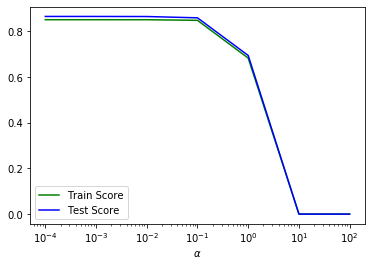

In [94]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [95]:
lasso_grid = Lasso(0.0001, max_iter=100000)
scores = cross_val_score(lasso_grid, X_train, y_train, cv = 5, scoring = 'r2')
print( " Train r2 CrossVal score: {}".format ( score ))
print( "Train Avg CrossVal score: {:.2f}".format ( score.mean()))

scores = cross_val_score(lasso_grid, X_test, y_test, cv = 5, scoring = 'r2')
print( " Test r2 CrossVal score: {}".format ( score ))
print( "Test Avg CrossVal score: {:.2f}".format ( score.mean()))



 Train r2 CrossVal score: [0.89365134 0.89661277 0.87558387 0.81757192 0.82642548]
Train Avg CrossVal score: 0.86
 Test r2 CrossVal score: [0.89365134 0.89661277 0.87558387 0.81757192 0.82642548]
Test Avg CrossVal score: 0.86


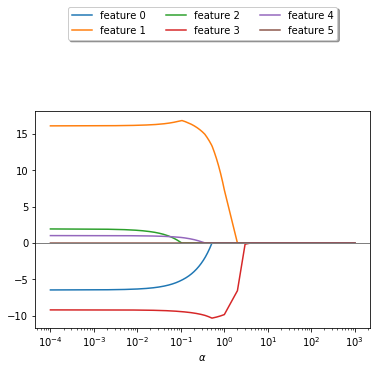

In [96]:
%matplotlib inline

x_range1 = np.linspace(0.0001, 1, 1000).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 1000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

for i in range(0,6):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

### Support Vector Machine

In [97]:
from sklearn.svm import LinearSVR
from sklearn.preprocessing import StandardScaler

### *Linear SVM*

In [98]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_search = GridSearchCV(LinearSVR(), param_grid, cv = 2, return_train_score = True, scoring = 'r2')

grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Highest CrossVal score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10}
Highest CrossVal score: 0.84


In [99]:
lin_svm = LinearSVR( C = 10 )

lin_svm.fit( X_train, y_train )
print( lin_svm.score ( X_train, y_train ))
print( lin_svm.score ( X_test, y_test ))

0.8492743732640391
0.8611940391520523


Text(0.5, 0, 'C')

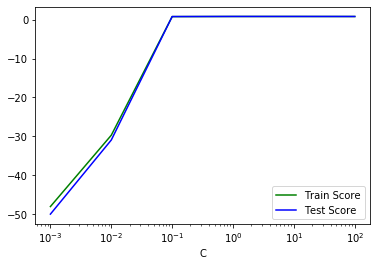

In [100]:
x_range = [0.001, 0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for c in x_range: 
    lin_svm = LinearSVR( C = c )
    lin_svm.fit( X_train, y_train )
    train_score_list.append( lin_svm.score( X_train,y_train ))
    test_score_list.append( lin_svm.score( X_test, y_test ))
%matplotlib inline
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 4)
plt.xlabel('C')

In [101]:
score = cross_val_score(LinearSVR(C = 10), X_train, y_train,cv = 5, scoring = 'r2')
print(" Train CrossVal score: {}".format(score))
print("Avg CrossVal score: {:.2f}".format(score.mean()))

score = cross_val_score(LinearSVR(C = 10), X_test, y_test, cv = 10, scoring = 'r2')
print("Test CrossVal score: {}".format(score))
print("Avg CrossVal score: {:.2f}".format(score.mean()))

 Train CrossVal score: [0.84425066 0.84085993 0.84174312 0.84809906 0.8661676 ]
Avg CrossVal score: 0.85
Test CrossVal score: [0.8521799  0.81474692 0.87290738 0.80105936 0.85476909 0.90789038
 0.87729335 0.85412904 0.86106796 0.84513401]
Avg CrossVal score: 0.85


### Kernalized SVM-rbf(Radial Basis Function)

In [102]:
from mlxtend.plotting import plot_decision_regions
from sklearn.svm import SVR
param_grid = {'gamma': [0.001, 0.01, 0.1, 1, 10, 100], 'C': [0.001, 0.01, .1, 10, 100]}

grid_search = GridSearchCV(SVR( kernel = 'rbf'), param_grid, return_train_score = True, cv = 5, scoring = 'r2')

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)


grid_search.fit(X_train, y_train)
print("Best Parameter: {}".format(grid_search.best_params_))
print("Highest CrossVal score: {:.2f}".format(grid_search.best_score_))

Best Parameter: {'C': 100, 'gamma': 1}
Highest CrossVal score: 0.93


In [103]:
score = cross_val_score(SVR(C = 10, kernel = 'rbf', gamma = 10), X_train, y_train,cv = 5, scoring = 'r2')
print("Train CrossVal score: {}".format(score))
print("Avg CrossVal score: {:.2f}".format(score.mean()))

score = cross_val_score(SVR(C =10, kernel = 'rbf', gamma = 10), X_test, y_test, cv = 5, scoring = 'r2')
print("Test CrossVal score: {}".format(score))
print("Avg CrossVal score: {:.2f}".format(score.mean()))

Train CrossVal score: [0.92486172 0.90500582 0.89861733 0.91118913 0.9136933 ]
Avg CrossVal score: 0.91
Test CrossVal score: [0.81416915 0.78269795 0.84446403 0.75936767 0.84393626]
Avg CrossVal score: 0.81


### Kernalized SVM-poly

In [104]:
param_grid = {'degree': [1,2,3,4,5],
             'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(SVR(kernel='poly', gamma = 'auto'), param_grid, cv=10, return_train_score=True)

grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 100, 'degree': 4}
Best cross-validation score: 0.88


In [105]:
svr_poly_grid = SVR(kernel='poly',degree = 4, C=100, gamma = 'auto')

scores = cross_val_score(svr_poly_grid, X_train, y_train, cv = 10, scoring = 'r2')
print(" Train Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(svr_poly_grid, X_test, y_test, cv = 10, scoring = 'r2')
print(" Test Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

 Train Cross-validation scores: [0.88492968 0.88816037 0.89252444 0.84563238 0.85767717 0.89092658
 0.89706698 0.89274411 0.91332351 0.88288211]
Average cross-validation score: 0.88
 Test Cross-validation scores: [0.91438275 0.85422667 0.85845879 0.9090973  0.91778444 0.93090088
 0.90073469 0.9034037  0.91806166 0.89396149]
Average cross-validation score: 0.90


### Kernalized SVM-Linear

In [106]:
param_grid = {'gamma': [0.001, 0.01, 0.1, 1, 10, 100],'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(SVR(kernel='linear'), param_grid, cv=10, return_train_score=True)

grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 1, 'gamma': 0.001}
Best cross-validation score: 0.85


In [107]:
svr_linear_grid = SVR(kernel='linear', gamma = 0.001 , C =1)

scores = cross_val_score(svr_linear_grid, X_train, y_train, cv = 10, scoring = 'r2')
print(" Train Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(svr_linear_grid, X_test, y_test, cv = 10, scoring = 'r2')
print(" Test Cross-validation scores: {}".format(scores))

print("Average cross-validation score: {:.2f}".format(scores.mean()))

 Train Cross-validation scores: [0.83427366 0.85286444 0.83732294 0.84458006 0.82306906 0.84137507
 0.85304448 0.84360587 0.86600452 0.86667118]
Average cross-validation score: 0.85
 Test Cross-validation scores: [0.85980543 0.81381533 0.87544854 0.81830125 0.85342405 0.90585045
 0.8767465  0.85547215 0.8625233  0.83502118]
Average cross-validation score: 0.86


### Decision Tree Regressor

In [108]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

dtree = DecisionTreeRegressor(random_state = 0)
#define a list of parameters
dtree_param = {"max_depth": range(1,10),
               "min_samples_split": range(2,10,1),
               "max_leaf_nodes": range(2,5)}

#apply grid search
dtree_grid = GridSearchCV(dtree, dtree_param, cv=5,n_jobs=-1,return_train_score = True,scoring='r2')
dtree_grid.fit(X_train, y_train)

#find best parameters
print("Best Mean Cross-validation score: {:}".format(dtree_grid.best_score_))
print('Best Parameters: ', dtree_grid.best_params_)

# Check data set performance
print("Decision Tree Train Performance: ", dtree_grid.score(X_train,y_train))
print("Decision Tree Test Performance: ", dtree_grid.score(X_test,y_test))
print('Validation score is: ' ,dtree_grid.score(X_test,y_test))



Best Mean Cross-validation score: 0.7426091346058508
Best Parameters:  {'max_depth': 3, 'max_leaf_nodes': 4, 'min_samples_split': 2}
Decision Tree Train Performance:  0.7673737799289788
Decision Tree Test Performance:  0.7421314341671357
Validation score is:  0.7421314341671357


### Best Regressor and Parameters

###__ Of all the regression models Polynomial Regression has the comparatively best values from Train,test and cross validation. The Values of train and test are close enough which are 0.91 and 0.92 respectively.The best parameter is Polynomial regression of degree 2.

In [109]:
# Fitting Polynomial Regression to the dataset 
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics 

poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

lin2 = LinearRegression() 
lin2.fit(X_train_poly, y_train) 
y_pred = lin2.predict(X_test_poly)

print('R-Square', metrics.r2_score(y_test, y_pred))


R-Square 0.9221804884937346


##          **Classification**

### Content for Classification Dataset

### Source : https://archive.ics.uci.edu/ml/datasets/Diabetic+Retinopathy+Debrecen+Data+Set

### This dataset contains features extracted from the Messidor image set to predict whether an image contains signs of diabetic retinopathy or not. All features represent either a detected lesion, a descriptive feature of a anatomical part or an image-level descriptor. The underlying method image analysis and feature extraction as well as our classification technique is described in Balint Antal, Andras Hajdu: An ensemble-based system for automatic screening of diabetic retinopathy, Knowledge-Based Systems 60 (April 2014), 20-27.

Attribute Information:

0) The binary result of quality assessment. 0 = bad quality 1 = sufficient quality.
1) The binary result of pre-screening, where 1 indicates severe retinal abnormality and 0 its lack.
2-7) The results of MA detection. Each feature value stand for the
number of MAs found at the confidence levels alpha = 0.5, . . . , 1, respectively.
8-15) contain the same information as 2-7) for exudates. However,
as exudates are represented by a set of points rather than the number of
pixels constructing the lesions, these features are normalized by dividing the
number of lesions with the diameter of the ROI to compensate different image
sizes.
16) The euclidean distance of the center of
the macula and the center of the optic disc to provide important information
regarding the patientâ€™s condition. This feature
is also normalized with the diameter of the ROI.
17) The diameter of the optic disc.
18) The binary result of the AM/FM-based classification.
19) Class label. 1 = contains signs of DR (Accumulative label for the Messidor classes 1, 2, 3), 0 = no signs of DR.



In [110]:
#Importing required libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import mglearn as mg 

import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [111]:
#We are importing data here 
sample_data = pd.read_csv('messidor_features.csv', header = 0)

In [112]:
# We are checking the first 5 rows of the dataset
sample_data.head()

,id,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,Class
0,1,1,1,22,22,22,19,18,14,49.895756,...,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1,0
1,2,1,1,24,24,22,18,16,13,57.709936,...,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0,0
2,3,1,1,62,60,59,54,47,33,55.831441,...,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0,1
3,4,1,1,55,53,53,50,43,31,40.467228,...,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0,0
4,5,1,1,44,44,44,41,39,27,18.026254,...,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0,1


In [113]:
# We understand the number of instances and attributes in the dataset
sample_data.shape

(1151, 21)

In [114]:
# We are checking the number of missing values in the dataset
sample_data.isnull().sum()

id       0
0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
Class    0
dtype: int64

In [115]:
#Another method of checking the missing values in the dataset
#Also, checks the data types of the columns in the dataset  
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1151 entries, 0 to 1150
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      1151 non-null   int64  
 1   0       1151 non-null   int64  
 2   1       1151 non-null   int64  
 3   2       1151 non-null   int64  
 4   3       1151 non-null   int64  
 5   4       1151 non-null   int64  
 6   5       1151 non-null   int64  
 7   6       1151 non-null   int64  
 8   7       1151 non-null   int64  
 9   8       1151 non-null   float64
 10  9       1151 non-null   float64
 11  10      1151 non-null   float64
 12  11      1151 non-null   float64
 13  12      1151 non-null   float64
 14  13      1151 non-null   float64
 15  14      1151 non-null   float64
 16  15      1151 non-null   float64
 17  16      1151 non-null   float64
 18  17      1151 non-null   float64
 19  18      1151 non-null   int64  
 20  Class   1151 non-null   int64  
dtypes: float64(10), int64(11)
memory usag

In [116]:
#outputing the descriptive statistics of the dataset
sample_data.describe()

,id,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,Class
count,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,...,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000
mean,576.000000,0.996525,0.918332,38.428323,36.909644,35.140747,32.297133,28.747176,21.151173,64.096674,...,8.704610,1.836489,0.560738,0.212290,0.085674,0.037225,0.523212,0.108431,0.336229,0.530843
std,332.409386,0.058874,0.273977,25.620913,24.105612,22.805400,21.114767,19.509227,15.101560,58.485289,...,11.567589,3.923224,2.484111,1.057126,0.398717,0.178959,0.028055,0.017945,0.472624,0.499265
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.349274,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.367762,0.057906,0.000000,0.000000
25%,288.500000,1.000000,1.000000,16.000000,16.000000,15.000000,14.000000,11.000000,8.000000,22.271597,...,1.249050,0.081554,0.000000,0.000000,0.000000,0.000000,0.502855,0.095799,0.000000,0.000000
50%,576.000000,1.000000,1.000000,35.000000,35.000000,32.000000,29.000000,25.000000,18.000000,44.249119,...,4.423472,0.484829,0.022248,0.001554,0.000000,0.000000,0.523308,0.106623,0.000000,1.000000
75%,863.500000,1.000000,1.000000,55.000000,53.000000,51.000000,48.000000,43.000000,32.000000,87.804112,...,11.766880,1.921649,0.191953,0.038450,0.004832,0.003851,0.543670,0.119591,1.000000,1.000000
max,1151.000000,1.000000,1.000000,151.000000,132.000000,120.000000,105.000000,97.000000,89.000000,403.939108,...,106.070092,59.766121,51.423208,20.098605,5.937799,3.086753,0.592217,0.219199,1.000000,1.000000


In [117]:
sample_data['Class'].value_counts()

1    611
0    540
Name: Class, dtype: int64

In [118]:
#listing the columns in the dataset
sample_data.columns

Index(['id', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', 'Class'],
      dtype='object')

In [119]:
# imputing mean value of the column for missing rows
sample_data['2'] = sample_data.groupby(['Class']) ['2'].apply(lambda x:x.fillna(x.mean()))
sample_data['6'] = sample_data.groupby('Class') ['6'].apply(lambda x:x.fillna(x.mean()))
sample_data['12'] = sample_data.groupby('Class') ['12'].apply(lambda x:x.fillna(x.mean()))
sample_data['13'] = sample_data.groupby('Class') ['13'].apply(lambda x:x.fillna(x.mean()))
sample_data['15']= sample_data.groupby('Class') ['15'].apply(lambda x:x.fillna(x.mean()))
sample_data['17']= sample_data.groupby('Class') ['17'].apply(lambda x:x.fillna(x.mean()))

In [120]:
# We are again checking the number of missing values in the dataset
sample_data.isnull().sum()

id       0
0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
Class    0
dtype: int64

In [121]:
#checking the correlation between Class and all attributes
sample_data.corr()['Class']

id      -0.024825
0        0.062816
1       -0.076925
2        0.292603
3        0.266338
4        0.234691
5        0.197511
6        0.161631
7        0.127861
8        0.058015
9        0.000479
10       0.038281
11       0.104254
12       0.142273
13       0.151424
14       0.184772
15       0.177313
16       0.008466
17      -0.030868
18      -0.042144
Class    1.000000
Name: Class, dtype: float64

### Vizualization

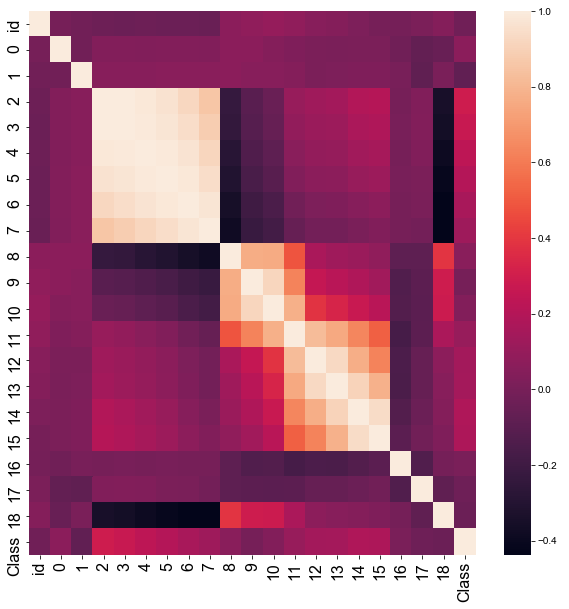

In [122]:
#constructing a heat map to check the correlation between all the variables

plt.figure(figsize=(10,10))
plt.tick_params(axis='both',labelsize=16)
sns.heatmap(sample_data.corr())
sns.set(style="darkgrid")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000231B57E4348>,
      dtype=object)

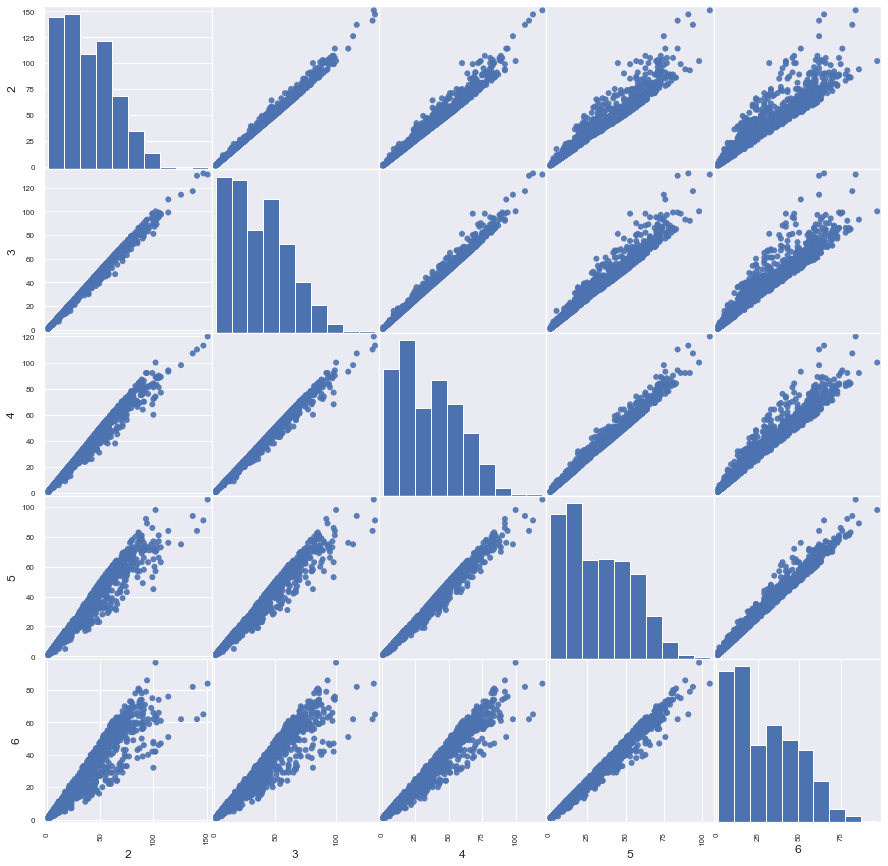

In [123]:
# We are generating a scatter plot for each variable against the target variable

from pandas.plotting import scatter_matrix
X = sample_data[['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18']]
y = sample_data['Class']
attributes = X.columns[2:7]
scatter_matrix(X[attributes], figsize = (15,15), alpha = 0.9, marker = 'O')

# Classification


Scope : We have 18 attributes based on which we are trying to predict the Class for instance of the dataset

Strategy: We will run various models on the dataset to see which model/models and their parameters give us the most accurate results as compared to the other models. The model/models which give a higher accurate prediction rate will be deemed better models.   

In [124]:
#defining the score function which help display the classification report
#and give us the accuracy results

from sklearn.metrics import classification_report, confusion_matrix

def score_func(y, y_pred):
    a=[]
    b=[]
    a.append('confusion_matrix')
    b.append(confusion_matrix(y, y_pred))
    a.append('classification_report')
    b.append(classification_report(y,y_pred))
    print(classification_report(y,y_pred))
    return pd.DataFrame(b, a)

## KNN Classification 

In [125]:
#running the KNN model

from sklearn.neighbors import KNeighborsClassifier

X_train_org, X_test_org, y_train, y_test = train_test_split (X, y, test_size=.25, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

param_grid = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]}
grid_search = GridSearchCV (KNeighborsClassifier(), param_grid, cv = 5, return_train_score = True, scoring = 'recall')

grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Highest CrossVal score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'n_neighbors': 13}
Highest CrossVal score: 0.61


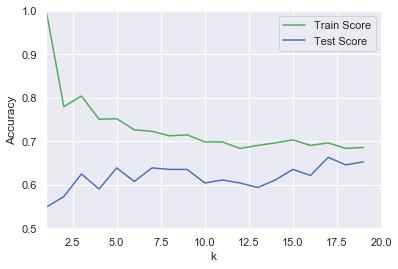

In [126]:
#plotting the train score and the test score

train_array = []
test_array = []
x_axis = range(1, 20)

for k in range(1, 20):
    knn=KNeighborsClassifier(k)   
    knn.fit(X_train,y_train)
    train_score=knn.score(X_train,y_train)
    test_score=knn.score(X_test,y_test)
    train_array.append(train_score)
    test_array.append(test_score)

line1, = plt.plot(x_axis, train_array, label = 'Train Score', c='g')
line2, = plt.plot(x_axis, test_array, label = 'Test Score', c='b')
plt.axis([1, 20, 0.5, 1])
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend(handles = [line1, line2],loc = 1)
plt.show()

In [127]:
#running cross-validation

score = cross_val_score ( KNeighborsClassifier (n_neighbors = 13), X_train_org, y_train, cv = 5, scoring = 'recall')
print( "Recall CrossVal score: {}".format ( score ))
print( "Avg CrossVal score: {:.2f}".format ( score.mean()))

score = cross_val_score ( KNeighborsClassifier(n_neighbors = 13), X_test_org, y_test, cv = 5, scoring = 'recall')
print( " Recall CrossVal score: {}".format ( score))
print( "Avg CrossVal score: {:.2f}".format ( score.mean()))

Recall CrossVal score: [0.6        0.58888889 0.50549451 0.63333333 0.57777778]
Avg CrossVal score: 0.58
 Recall CrossVal score: [0.6875  0.6875  0.625   0.71875 0.6875 ]
Avg CrossVal score: 0.68


In [128]:
score = cross_val_score ( KNeighborsClassifier ( n_neighbors = 13), X_train_org, y_train, cv = 5)
print( "Accuracy CrossVal score: {}".format ( score))
print( "Avg CrossVal score: {:.2f}".format ( score.mean()))

score = cross_val_score ( KNeighborsClassifier ( n_neighbors = 13), X_test_org, y_test, cv = 5)
print( "Accuracy CrossVal score: {}".format ( score))
print( "Avg CrossVal score: {:.2f}".format ( score.mean()))

Accuracy CrossVal score: [0.68786127 0.65317919 0.63583815 0.63953488 0.63953488]
Avg CrossVal score: 0.65
Accuracy CrossVal score: [0.68965517 0.68965517 0.60344828 0.70175439 0.64912281]
Avg CrossVal score: 0.67


In [129]:
#displaying the score function

knn = KNeighborsClassifier(n_neighbors = 13).fit(X_train,y_train)
y_pred = knn.predict(scaler.transform(X))
score_func(y, y_pred)

              precision    recall  f1-score   support

           0       0.62      0.73      0.67       540
           1       0.72      0.61      0.66       611

    accuracy                           0.67      1151
   macro avg       0.67      0.67      0.67      1151
weighted avg       0.67      0.67      0.67      1151



,0
confusion_matrix,"[[394, 146], [238, 373]]"
classification_report,precision recall f1-score ...


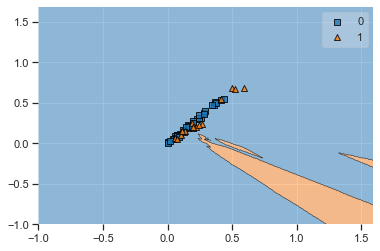

In [130]:
#KNN plot

X_b = X_train[100:150,[2,5]]
y_b = y_train[100:150]

knn = KNeighborsClassifier(13)
knn.fit(X_b, y_b) 

plot_decision_regions(X_b, y_b.values, clf = knn)

### The KNN analysis depicts that the best paramenter is 13 neighbors giving a cross-validation score of 62%. The accuracy of the model is 67%.

## Logistic Regression

In [131]:
#running the Logistic Regression model

from sklearn.linear_model import LogisticRegression

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, test_size = 0.25,  random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty':['l1', 'l2']}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv = 5, return_train_score = True, scoring = 'recall')

grid_search.fit(X_train, y_train)
print("Best Parameters: {}".format(grid_search.best_params_))
print("Highest CrossVal score: {:.2f}".format(grid_search.best_score_))

Best Parameters: {'C': 0.001, 'penalty': 'l2'}
Highest CrossVal score: 1.00


In [132]:
#plotting the train score and the test score

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c, solver = 'liblinear')
    log_l2 = LogisticRegression(penalty = 'l2', C = c, solver = 'liblinear')
    log_l1.fit(X_train, y_train)
    log_l2.fit(X_train, y_train)
    train_score_l1.append(log_l1.score(X_train, y_train))
    train_score_l2.append(log_l2.score(X_train, y_train))
    test_score_l1.append(log_l1.score(X_test, y_test))
    test_score_l2.append(log_l2.score(X_test, y_test))

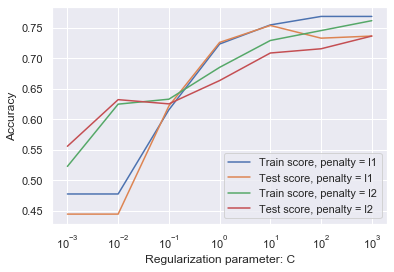

In [133]:
%matplotlib inline

plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

In [134]:
#running the cross-validation

score = cross_val_score(LogisticRegression(C = 0.001, penalty = 'l2'), X_train, y_train, cv = 5, scoring = 'recall')
print("CrossVal score: {}".format(score))
print("Avg CrossVal score: {:.2f}".format(score.mean()))

score = cross_val_score(LogisticRegression(C = 0.001, penalty = 'l2'), X_test, y_test, cv = 5, scoring = 'recall')
print("CrossVal score: {}".format(score))
print("Avg CrossVal score: {:.2f}".format(score.mean()))

CrossVal score: [1. 1. 1. 1. 1.]
Avg CrossVal score: 1.00
CrossVal score: [1. 1. 1. 1. 1.]
Avg CrossVal score: 1.00


In [135]:
score = cross_val_score(LogisticRegression(C = 0.001, penalty = 'l2'), X_train, y_train, cv = 5)
print("CrossVal score: {}".format(score))
print("Avg CrossVal score: {:.2f}".format(score.mean()))

score = cross_val_score(LogisticRegression(C = 0.001, penalty = 'l2'), X_test, y_test, cv = 5)
print("CrossVal score: {}".format(score))
print("Avg CrossVal score: {:.2f}".format(score.mean()))

CrossVal score: [0.52023121 0.52023121 0.52601156 0.52325581 0.52325581]
Avg CrossVal score: 0.52
CrossVal score: [0.55172414 0.55172414 0.55172414 0.56140351 0.56140351]
Avg CrossVal score: 0.56


In [136]:
#displaying the score function

lr = LogisticRegression( C = 0.001, penalty = 'l2').fit(X_train, y_train)
y_pred = lr.predict(scaler.transform(X))
score_func(y, y_pred)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       540
           1       0.53      1.00      0.69       611

    accuracy                           0.53      1151
   macro avg       0.27      0.50      0.35      1151
weighted avg       0.28      0.53      0.37      1151



,0
confusion_matrix,"[[0, 540], [0, 611]]"
classification_report,precision recall f1-score ...


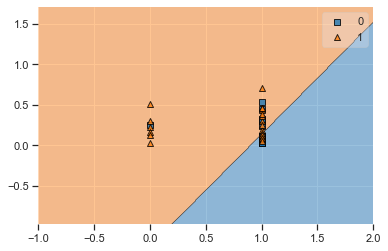

In [137]:
#logistic regression model plot 

%matplotlib inline

X_b = X_train[10:50, [1,3]]
y_b = y_train[10:50]

lreg = LogisticRegression()
lreg.fit(X_b, y_b) 

plot_decision_regions(X_b, y_b.values, clf = lreg)

### The Logistic Regression depicts that the best paramenter is C= 0.001 with penalty = l2 giving a cross-validation score of 100%. The accuracy of the model is 53%.

## Linear SVM

In [138]:
#running the Linear SVM model

from sklearn.svm import LinearSVC

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_search = GridSearchCV(LinearSVC(), param_grid, cv = 2, return_train_score = True, scoring = 'recall')

grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Highest CrossVal score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 100}
Highest CrossVal score: 0.68


In [139]:
#printing the score

lin_svm = LinearSVC( C = 10 )

lin_svm.fit( X_train, y_train )
print( lin_svm.score ( X_train, y_train ))
print( lin_svm.score ( X_test, y_test ))

0.7636152954808807
0.7222222222222222


Text(0.5, 0, 'C')

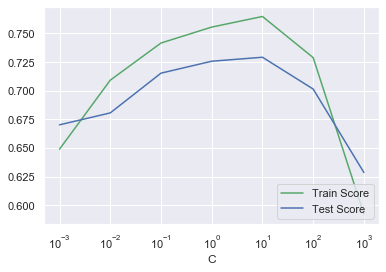

In [140]:
#train score and test score plot

x_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_list = []
test_score_list = []

for c in x_range: 
    lin_svm = LinearSVC( C = c )
    lin_svm.fit( X_train, y_train )
    train_score_list.append( lin_svm.score( X_train,y_train ))
    test_score_list.append( lin_svm.score( X_test, y_test ))
%matplotlib inline
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 4)
plt.xlabel('C')

In [141]:
#running the cross-validation

score = cross_val_score(LinearSVC(C = 10), X_train, y_train,cv = 10, scoring = 'recall')
print("Recall CrossVal score: {}".format(score))
print("Avg CrossVal score: {:.2f}".format(score.mean()))

score = cross_val_score(LinearSVC(C = 10), X_test, y_test, cv = 10, scoring = 'recall')
print("Recall CrossVal score: {}".format(score))
print("Avg CrossVal score: {:.2f}".format(score.mean()))

Recall CrossVal score: [0.68888889 0.8        0.73913043 0.53333333 0.53333333 0.6
 0.66666667 0.73333333 0.68888889 0.64444444]
Avg CrossVal score: 0.66
Recall CrossVal score: [0.75   0.875  0.625  0.75   0.625  0.625  0.625  0.75   0.6875 0.6875]
Avg CrossVal score: 0.70


In [142]:
score = cross_val_score(LinearSVC(C = 10), X_train, y_train, cv = 10)
print("CrossVal score: {}".format(score))
print("Avg CrossVal score: {:.2f}".format(score.mean()))

score = cross_val_score(LinearSVC(C = 10), X_test, y_test, cv = 10)
print("CrossVal score: {}".format(score))
print("Avg CrossVal score: {:.2f}".format(score.mean()))

CrossVal score: [0.7816092  0.8045977  0.82758621 0.69767442 0.6744186  0.73255814
 0.74418605 0.74418605 0.74418605 0.76744186]
Avg CrossVal score: 0.75
CrossVal score: [0.68965517 0.82758621 0.62068966 0.79310345 0.72413793 0.79310345
 0.5862069  0.72413793 0.78571429 0.67857143]
Avg CrossVal score: 0.72


In [143]:
#displaying the score function

lin_svm = LinearSVC( C = 10 )

lin_svm.fit( X_train,y_train )
y_pred = lin_svm.predict( scaler.transform( X ))
score_func(y, y_pred)

              precision    recall  f1-score   support

           0       0.69      0.85      0.76       540
           1       0.83      0.66      0.74       611

    accuracy                           0.75      1151
   macro avg       0.76      0.76      0.75      1151
weighted avg       0.77      0.75      0.75      1151



,0
confusion_matrix,"[[458, 82], [205, 406]]"
classification_report,precision recall f1-score ...


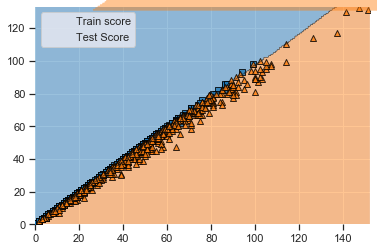

In [144]:
#plotting the linear svm

from sklearn.svm import LinearSVC

%matplotlib inline

X = sample_data[['2','3']]
y = sample_data["Class"]

clf = LinearSVC()
clf.fit(X,y)

plot_decision_regions(X.values, y.values, clf)
plt.legend(['Train score', 'Test Score'])

### The Linear SVM depicts that the best paramenter is C= 1000 giving a cross-validation score of less than 72%. The accuracy of the model is 70%.

## Decision Tree

In [145]:
#running the Decision Tree model

from sklearn.tree import DecisionTreeClassifier

X = sample_data[['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18']]
y = sample_data['Class']

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.25)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

param_grid = {'max_depth': [4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18]}
grid_search = GridSearchCV( DecisionTreeClassifier(), param_grid, cv = 5, return_train_score = True, scoring='recall')
grid_search.fit(X_train, y_train)
print("Best parameter: {}".format(grid_search.best_params_))
print("Highest CrossVal score: {:.2f}".format(grid_search.best_score_))

Best parameter: {'max_depth': 14}
Highest CrossVal score: 0.62


In [146]:
#fixing the max_depth at 15 as the above formula gives best parameters in the range of 15-18.
#the cross-validation score is in the range of 0.64-0.68.

dtree = DecisionTreeClassifier(max_depth = 15, random_state = 0)
dtree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

Accuracy on training set: 0.976
Accuracy on test set: 0.653


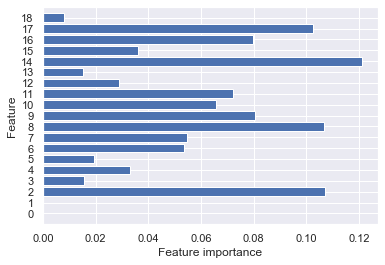

In [147]:
#constructing the feature importance model

%matplotlib inline

def plot_feature_importances(model):
    n_features = len(X.columns)
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    
dtree = DecisionTreeClassifier( max_depth = 15, random_state = 0).fit(X_train,y_train)
plot_feature_importances(dtree) 

In [148]:
#running cross-validation

score = cross_val_score(dtree, X_train, y_train, cv = 5, scoring = 'recall')
print("Recall CrossVal score: {}".format(score))
print("Avg CrossVal score: {:.2f}".format(score.mean()))

score = cross_val_score(dtree, X_test, y_test, cv = 5, scoring = 'recall')
print(" Recall CrossVal score: {}".format(score))
print("Avg CrossVal score: {:.2f}".format(score.mean()))

Recall CrossVal score: [0.61111111 0.57777778 0.65934066 0.64444444 0.5       ]
Avg CrossVal score: 0.60
 Recall CrossVal score: [0.625   0.71875 0.625   0.5625  0.71875]
Avg CrossVal score: 0.65


In [149]:
score = cross_val_score(dtree, X_train, y_train, cv = 5)
print("Accuracy CrossVal score: {}".format(score))
print("Avg CrossVal score: {:.2f}".format(score.mean()))

score = cross_val_score(dtree, X_test, y_test, cv = 5)
print("Accuracy CrossVal score: {}".format(score))
print("Avg CrossVal score: {:.2f}".format(score.mean()))

Accuracy CrossVal score: [0.58959538 0.60693642 0.66473988 0.6744186  0.5872093 ]
Avg CrossVal score: 0.62
Accuracy CrossVal score: [0.5862069  0.62068966 0.5862069  0.63157895 0.68421053]
Avg CrossVal score: 0.62


In [150]:
#depicting the score function 

y_pred = dtree.predict(scaler.transform(X))
score_func(y, y_pred)

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       540
           1       0.92      0.88      0.90       611

    accuracy                           0.89      1151
   macro avg       0.89      0.90      0.89      1151
weighted avg       0.90      0.89      0.89      1151



,0
confusion_matrix,"[[491, 49], [72, 539]]"
classification_report,precision recall f1-score ...


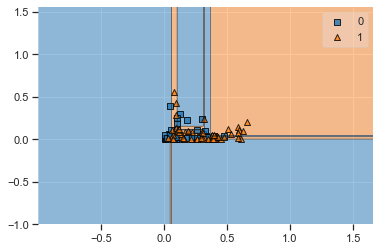

In [151]:
#Decision tree plot

X_b =  X_train[:100,[2,10]]
y_b = y_train[:100]

dtree = DecisionTreeClassifier(max_depth = 15)
dtree.fit(X_b, y_b)

plot_decision_regions(X_b, y_b.values, clf = dtree)

### The Decision Tree model depicts that the best paramenter is max_depth = 15 giving a cross-validation score of 65%. The accuracy of the model is 84%.

# Kernelized SVM - rbf

In [152]:
#running the kernelized svm - rbf model

from sklearn.svm import SVC

param_grid = {'gamma': [0.001, 0.01, 0.1, 1, 10, 100], 'C': [0.001, 0.01, .1, 10, 100]}

grid_search = GridSearchCV( SVC ( kernel = 'rbf'), param_grid, return_train_score = True, cv = 5, scoring = 'recall')

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)


grid_search.fit(X_train, y_train)
print("Best Parameter: {}".format(grid_search.best_params_))
print("Highest CrossVal score: {:.2f}".format(grid_search.best_score_))

Best Parameter: {'C': 0.001, 'gamma': 0.001}
Highest CrossVal score: 1.00


In [153]:
#running cross-validation

score = cross_val_score(SVC (C = 0.001, kernel = 'rbf', gamma = 0.001), X_train, y_train,cv = 5, scoring = 'recall')
print("Recall CrossVal score: {}".format(score))
print("Avg CrossVal score: {:.2f}".format(score.mean()))

score = cross_val_score(SVC (C = 0.001, kernel = 'rbf', gamma = 0.001), X_test, y_test, cv = 5, scoring = 'recall')
print(" Recall CrossVal score: {}".format(score))
print("Avg CrossVal score: {:.2f}".format(score.mean()))

Recall CrossVal score: [1. 1. 1. 1. 1.]
Avg CrossVal score: 1.00
 Recall CrossVal score: [1. 1. 1. 1. 1.]
Avg CrossVal score: 1.00


In [154]:
score = cross_val_score(SVC (C = 0.001, kernel = 'rbf', gamma = 0.001), X_train, y_train, cv = 5)
print("CrossVal score: {}".format(score))
print("Avg CrossVal score: {:.2f}".format(score.mean()))

score = cross_val_score(SVC (C = 0.001, kernel = 'rbf', gamma = 0.001), X_test, y_test, cv = 5)
print("CrossVal score: {}".format(score))
print("Avg CrossVal score: {:.2f}".format(score.mean()))

CrossVal score: [0.52023121 0.52023121 0.52601156 0.52325581 0.52325581]
Avg CrossVal score: 0.52
CrossVal score: [0.55172414 0.55172414 0.55172414 0.56140351 0.56140351]
Avg CrossVal score: 0.56


In [155]:
#depicting the score function

svm_rbf = SVC(C = 0.001, kernel = 'rbf', gamma = 0.001)
svm_rbf.fit(X_train, y_train)

y_pred = svm_rbf.predict( scaler.transform( X ))
score_func(y, y_pred)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       540
           1       0.53      1.00      0.69       611

    accuracy                           0.53      1151
   macro avg       0.27      0.50      0.35      1151
weighted avg       0.28      0.53      0.37      1151



,0
confusion_matrix,"[[0, 540], [0, 611]]"
classification_report,precision recall f1-score ...


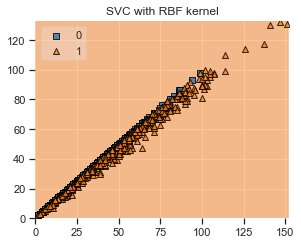

In [156]:
#kernelized svm- rbf plot

%matplotlib inline

import matplotlib.gridspec as gridspec
import itertools

X = sample_data[['2', '3']]
y = sample_data['Class']

C = 0.001
clf = SVC ( kernel = 'rbf', gamma = 0.001, C = C)

gs = gridspec.GridSpec( 2, 2 )
fig = plt.figure(figsize = (10, 8))

labels = ['SVC with RBF kernel']

for clf, lab, grd in zip([clf],
                         labels,
                         itertools.product([0, 1],
                         repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs [grd[0], grd[1]])
    fig = plot_decision_regions(X = X.values, y = y.values,
                                clf = clf, legend = 2)
    plt.title(lab)

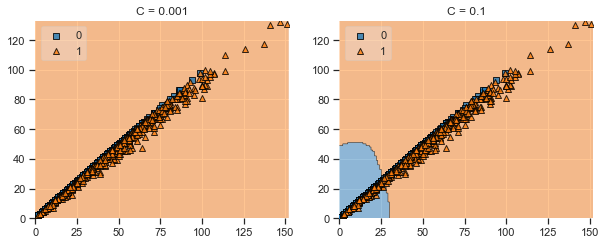

In [157]:
#plot showing the differnce between different values of C

%matplotlib inline

X = sample_data[['2', '3']]
y = sample_data['Class']

gamma = 0.001
clf1 = SVC(kernel='rbf', gamma = gamma, C = 0.001)
clf2 = SVC(kernel='rbf', gamma = gamma, C = 0.1)

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

labels = ['C = 0.001',
          'C = 0.1']

for clf, lab, grd in zip([clf1, clf2],
                         labels,
                         itertools.product([0, 1],
                         repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X = X.values, y = y.values,
                                clf = clf, legend = 2)
    plt.title(lab)

### The Kernelized SVM - rbf model depicts that the best paramenter is C = 0.001 and gamma = 0.001 giving a cross-validation score of 100%. The accuracy of the model is 53%.

## Kernelized SVM - poly

In [158]:
#running the kernelized svm - poly model 

from sklearn.svm import SVC

param_grid = {'gamma': [0.01, 0.1, 1], 'C': [ 1, 10, 100], 'degree': [1, 2, 3]}

grid_search = GridSearchCV( SVC ( kernel = 'poly'), param_grid, return_train_score = True, cv = 5, scoring = 'recall')

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)


grid_search.fit(X_train, y_train)
print("Best Parameter: {}".format(grid_search.best_params_))
print("Highest Score {:.2f}".format(grid_search.best_score_))

Best Parameter: {'C': 1, 'degree': 2, 'gamma': 0.01}
Highest Score 1.00


In [159]:
#running the cross-validation

score = cross_val_score( SVC ( kernel = 'poly', gamma = 0.01, C = 1, degree = 2), X_train, y_train, cv = 5, scoring = 'recall')
print("Recall CrossVal score: {}".format(score))
print("Avg CrossVal score: {:.2f}".format(score.mean()))

score = cross_val_score( SVC ( kernel = 'poly', gamma = 0.01, C = 1, degree = 2), X_test, y_test,cv = 5, scoring = 'recall')
print("Recall CrossVal score: {}".format(score))
print("Avg CrossVal score: {:.2f}".format(score.mean()))

Recall CrossVal score: [1. 1. 1. 1. 1.]
Avg CrossVal score: 1.00
Recall CrossVal score: [1. 1. 1. 1. 1.]
Avg CrossVal score: 1.00


In [160]:
score = cross_val_score( SVC ( kernel = 'poly', gamma = 0.01, C = 1, degree = 2), X_train, y_train, cv = 5)
print("CrossVal score: {}".format(score))
print("Avg CrossVal score: {:.2f}".format(score.mean()))

score = cross_val_score( SVC ( kernel = 'poly', gamma = 0.01, C = 1, degree = 2), X_test, y_test, cv = 5)
print("CrossVal score: {}".format(score))
print("Avg CrossVal score: {:.2f}".format(score.mean()))

CrossVal score: [0.52023121 0.52023121 0.52601156 0.52325581 0.52325581]
Avg CrossVal score: 0.52
CrossVal score: [0.55172414 0.55172414 0.55172414 0.56140351 0.56140351]
Avg CrossVal score: 0.56


In [161]:
#depicting the score function

svm_poly = SVC (kernel = 'poly', gamma = 0.01, C = 1, degree = 2)
svm_poly.fit(X_train,y_train)

y_pred = svm_poly.predict(scaler.transform(X))
score_func(y, y_pred)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       540
           1       0.53      1.00      0.69       611

    accuracy                           0.53      1151
   macro avg       0.27      0.50      0.35      1151
weighted avg       0.28      0.53      0.37      1151



,0
confusion_matrix,"[[0, 540], [0, 611]]"
classification_report,precision recall f1-score ...


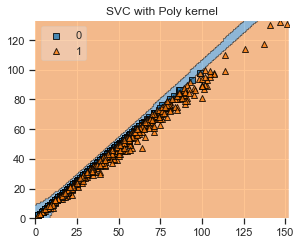

In [162]:
#kernelized svm - poly model 

%matplotlib inline

import matplotlib.gridspec as gridspec
import itertools

X = sample_data[['2', '3']]
y = sample_data['Class']

C = 1
clf = SVC ( kernel = 'poly', gamma = 0.01, C = C)

gs = gridspec.GridSpec( 2, 2 )
fig = plt.figure(figsize = (10, 8))

labels = ['SVC with Poly kernel']

for clf, lab, grd in zip([clf],
                         labels,
                         itertools.product([0, 1],
                         repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs [grd[0], grd[1]])
    fig = plot_decision_regions(X = X.values, y = y.values,
                                clf = clf, legend = 2)
    plt.title(lab)

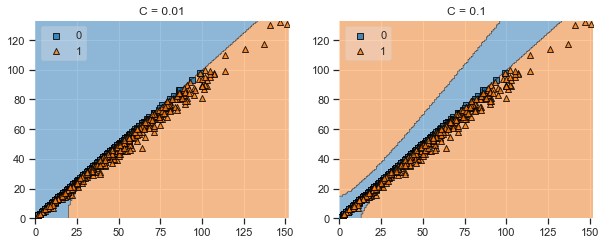

In [163]:
#plot showing the differnce between different values of C

%matplotlib inline

X = sample_data[['2', '3']]
y = sample_data['Class']

gamma = 0.01
clf1 = SVC(kernel='poly', gamma = gamma, C = 0.01)
clf2 = SVC(kernel='poly', gamma = gamma, C = 0.1)

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

labels = ['C = 0.01',
          'C = 0.1']

for clf, lab, grd in zip([clf1, clf2],
                         labels,
                         itertools.product([0, 1],
                         repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X = X.values, y = y.values,
                                clf = clf, legend = 2)
    plt.title(lab)

### The Kernelized SVM - poly model depicts that the best paramenter is C = 1, gamma = 0.01 and degree = 2 giving a cross-validation score of 100%. The accuracy of the model is 53%.

## Kernelized SVM - linear

In [164]:
#running the kernelized svm - linear model 

from sklearn.svm import SVC

param_grid = {'gamma': [0.01, 0.1, 1, 10], 'C': [0.01, 0.1, 1, 10]}

grid_search = GridSearchCV( SVC( kernel = 'linear'), param_grid, return_train_score = True, cv = 5, scoring = 'recall')

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)


grid_search.fit(X_train, y_train)
print("Best Parameter: {}".format(grid_search.best_params_))
print("Highest CrossVal score: {:.2f}".format(grid_search.best_score_))

Best Parameter: {'C': 0.1, 'gamma': 0.01}
Highest CrossVal score: 0.56


In [165]:
#running the cross-validation

score = cross_val_score( SVC (kernel = 'linear', C = 0.1, gamma = 0.01), X_train, y_train, cv = 5, scoring = 'recall')
print("Recall CrossVal score: {}".format(score))
print("Avg CrossVal score: {:.2f}".format(score.mean()))

score = cross_val_score(SVC (kernel = 'linear', C = 0.1, gamma = 0.01), X_test, y_test, cv = 5, scoring = 'recall')
print("Recall CrossVal score: {}".format(score))
print("Avg CrossVal score: {:.2f}".format(score.mean()))

Recall CrossVal score: [0.53333333 0.65555556 0.48351648 0.58888889 0.53333333]
Avg CrossVal score: 0.56
Recall CrossVal score: [0.65625 0.59375 0.53125 0.5625  0.625  ]
Avg CrossVal score: 0.59


In [166]:
score = cross_val_score(SVC ( kernel = 'linear', C = 0.1, gamma = 0.01), X_train, y_train, cv = 5)
print("CrossVal score: {}".format(score))
print("Avg CrossVal score: {:.2f}".format(score.mean()))

score = cross_val_score(SVC ( kernel = 'linear', C = 0.1, gamma = 0.01), X_test, y_test, cv = 5)
print("CrossVal score: {}".format(score))
print("Avg CrossVal score: {:.2f}".format(score.mean()))

CrossVal score: [0.60693642 0.65895954 0.54913295 0.61046512 0.56395349]
Avg CrossVal score: 0.60
CrossVal score: [0.65517241 0.5862069  0.56896552 0.57894737 0.61403509]
Avg CrossVal score: 0.60


In [167]:
#depicting the score function

svm_linear = SVC(kernel = 'linear', C = 0.1, gamma = 0.01)
svm_linear.fit(X_train, y_train)

y_pred = svm_linear.predict(scaler.transform(X))
score_func(y, y_pred)

              precision    recall  f1-score   support

           0       0.56      0.64      0.60       540
           1       0.64      0.56      0.60       611

    accuracy                           0.60      1151
   macro avg       0.60      0.60      0.60      1151
weighted avg       0.60      0.60      0.60      1151



,0
confusion_matrix,"[[346, 194], [269, 342]]"
classification_report,precision recall f1-score ...


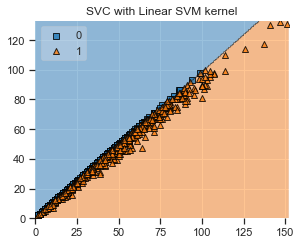

In [168]:
#kernelized svm - linear model 

%matplotlib inline

import matplotlib.gridspec as gridspec
import itertools

X = sample_data[['2', '3']]
y = sample_data['Class']

C = 0.1
clf = SVC ( kernel = 'linear', gamma = 0.01, C = C)

gs = gridspec.GridSpec( 2, 2 )
fig = plt.figure(figsize = (10, 8))

labels = ['SVC with Linear SVM kernel']

for clf, lab, grd in zip([clf],
                         labels,
                         itertools.product([0, 1],
                         repeat = 2)):
    clf.fit(X, y)
    ax = plt.subplot(gs [grd[0], grd[1]])
    fig = plot_decision_regions(X = X.values, y = y.values,
                                clf = clf, legend = 2)
    plt.title(lab)

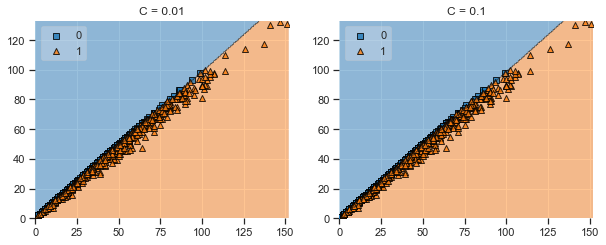

In [169]:
#plot showing the differnce between different values of C

%matplotlib inline

X = sample_data[['2', '3']]
y = sample_data['Class']

gamma = 0.01
clf1 = SVC(kernel='linear', gamma = gamma, C = 0.01)
clf2 = SVC(kernel='linear', gamma = gamma, C = 0.1)

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

labels = ['C = 0.01',
          'C = 0.1']

for clf, lab, grd in zip([clf1, clf2],
                         labels,
                         itertools.product([0, 1],
                         repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X = X.values, y = y.values,
                                clf = clf, legend = 2)
    plt.title(lab)

### The Kernelized SVM - linear model depicts that the best paramenter is C = 0.1, gamma = 0.01 giving a cross-validation score of 56%. The accuracy of the model is 60%.

## Decision Strategy: 

### Based on the Cross - Validation Scores and Classification Reports, Decision Tree Classification is the best model among all other models for our dataset. However, when we take the model graphs into picture, Kernelized SVM - Linear Classification model is showng the best results. The Decision Tree Model's graph shows many misclassifications therefore we recommend Kernelized SVM - Linear Classification model based on the graph.